# Logika Algorytmiczna dla Inżynierów
## Projekt semestralny
## Reprezentacja ciągu Fibonacciego na grafach
## **Bartłomiej Bieńko**

### Politechnika Krakowska - 2021
___

## Wstęp

Ten dokument dotyczy projektu semestralnego na przedmiot **Logika Algorytmiczna dla Inżynierów** realizowanego na Politechnice Krakowskiej im. Tadeusza Kościuszki w roku akademickim 2020/2021.

Tematem projektu jest zaprezentowanie **ciągu Fibonacciego w postaci grafu**. 

Projekt jest zrealizowany w języku **Pythob** przy użyciu biblotek **Networkx** oraz **Matplotlib**.

## Słownik

Poniżej wypisane są pojęcia niezbędne do zrozumienia ninejszego projektu. Tam gdzie to stosowne dodano odnośniki to literatury i stron WWW.

**Ciąg Fibonacciego** to ciąg liczb naturalnych, w którym pierwsze dwa wyrazy mają stałą wartość równą 1, a każdy kolejny wyraz stanowi sumę dwóch poprzednich. Jest więc to **ciąg rekurencyjny**.

Wzór matematyczny ciągu Fibonacciego:

$$ 
  F_n = 
  \begin{cases}
    1       & \quad \mathrm{dla } \space n \space \mathrm{ = 1}\\
    2       & \quad \mathrm{dla } \space n \space \mathrm{ = 2}\\
    F_{n-1} + F_{n-2}       & \quad \mathrm{dla } \space n \space \mathrm{ \geq 3}
  \end{cases}
$$

**Graf** to obiekt matematyczny składający się z dwóch zbiorów: **wierzchołków** i **krawędzi** (określonych jako połączenie, na końcu których znajdują się wierzchołki). Wyczerpujący opis czym są grafy znajduje się [pod tym adresem](https://pl.wikipedia.org/wiki/Graf_(matematyka)).

**Obliczenia symboliczne** polegają na wykonywaniu operacji, w których argumenty działań matematycznych (na przykład dodwania, mnożenia etc.) mogą być zapisywane w postaci symboli. Stąd zapis $a +  b = c$ może oznaczać, że $a$ oraz $b$ to zbiór matematyczny, wielomian, dowolona liczba (rzeczywista lub urujona).

### Pojęcia w kontekście projektu

W tym projekcie cała uwaga jest skupiona na ciągach Fibonacciego - prawidłowym wyznaczaniu *n* jego wyrazów i reprezentacji całości na grafie. Przyjęto, że zapis symboliczny $Fib(n)$ oznacza n-ty ciąg wyrazu Fibonacciego. 

Ponieważ celem nie jest sam wynik (wartość n-tego wyrazu), a reprezentacja ciągu to rysowany graf składa się z n wierzchołków - wyrazów ciągu, których krawędzie określają relację - rodzaj operacji wykonywanym na danym węźle.



## Implementacja

Węzłami w generowanym grafie są kolejne wartości ciągu Fibonacciego. Wartości wyrazów dla n = 1 oraz n = 2 są stałe, pozostałe wyrazy (dla n >= 3) są obliczane rekurecyjnie jako suma dwóch pozostałych węzłów.

Każdy taki wyraz zawiera operację "+" zaznaczoną na wygenerowanym grafie. Ponadto każdy węzeł zawiera informacje o wartości oraz indeksie.

Argumenty operacji dodawania na węźle są zaznaczone strzałkami - skierowanymi krawędziami na dany węzeł.

Jako węzły w niniejszym projekcie wysętpują obiekty klasy `simple_node`.

In [ ]:
# dołączenie niezbędnych biblotek

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
class simple_node():
  def __init__(self, value : int, label : str = "", index : int = 0):
    self.value = value
    self.label = label
    self.index = index

  def __hash__(self):
    return int(self.value)

  def __str__(self):
    if not self.label:
      return f"F({self.index}) = {self.value}"
    else:
      return f"{self.label}\nF({self.index})\n= {self.value}"

  def __lt__(self, other):
    if type(other) == int:
      return self.value < other
    else:
      return self.value < other.value

  def __le__(self, other):
    if type(other) == int:
        return self.value <= other
    else:
        return self.value <= other.value

  def __eq__(self, other):
    if type(other) == int:
      return self.value == other
    else:
      return self.value == other.value

  def __ne__(self, other):
    if type(other) == int:
      return self.value != other
    else:
      return self.value != other.value

  def __gt__(self, other):
    if type(other) == int:
      return self.value > other
    else:
      return self.value > other.value

  def __ge__(self, other):
    if type(other) == int:
      return self.value >= other
    else:
      return self.value >= other.value



In [ ]:
def Fib(n):

    # fib_graph to obiekt reprezentujący graf
    # na który składa się zbiór wierzchołków (wyrazy ciągu Fibonacciego)
    # oraz zbiór krawędzi (określający relacje pomiedzy poszczególnymi wierzchołkami)

    fib_graph = nx.DiGraph()

    # tmp_a oraz tmp_b stanowią symboliczny zapis dwóch wyrazów ciągu Fibonaciego
    # ponieważ n-ty wyraz (dla n >= 3) jest obliczany rekurencyjnie, bazując na dwóch
    # poprzednich wyrazach, stąd przyjąto taką implementację

    tmp_a, tmp_b = 1, 2 # wartości początkowe

    tmp_list = [tmp_a, tmp_b] # lista umożliwiająca łatwe przechowywanie kolejnych wartości ciągu (te wartości będą potrzebne do uzyskiwania danego węzła w fib_graph)

    if (n <= 0):
        raise Exception
    elif (n == 1): # Brak jakichkolwiek krawędzi
        fib_graph.add_node(simple_node(value=tmp_a, index=1))
        return fib_graph
    elif (n == 2): # Brak jakichkolwiek krawędzi
        fib_graph.add_node(simple_node(value=tmp_a, index=1))
        fib_graph.add_node(simple_node(value=tmp_b, index=2))
        return fib_graph
    else:
        fib_graph.add_node(simple_node(value=tmp_a, index=1))
        fib_graph.add_node(simple_node(value=tmp_b, index=2))
        for i in range(n-2):

            # Dodanie n-tego wyrazu ciągu do zbioru wierzchołków
            fib_graph.add_node(simple_node(value=int(tmp_a+tmp_b), index=i+3, label="+"))

            # Obliczenie n-tego wyrazu (wartość zmiennej tmp_b) ze wzoru
            tmp_a, tmp_b = tmp_b, tmp_a+tmp_b

            tmp_list.append(tmp_b)

            # Dodanie połączeń do wierzechołka - n-ty wyraz ma relację do dwóch poprzednich
            # Ponieważ networkx identyfikuje wierzchołki na bazie hashu obiektu
            # a w tym przypadku obiekty są liczbami (więc hash jest równy wartości tej liczby)
            # możemy określić wierzchołek bezpośrednio jako liczbę

            # Węzły można identyfikować na bazie ich wartości (tj. liczb całkowitych)
            fib_graph.add_edge(tmp_list[-2], tmp_list[-1]) # krawędź pomiędzy obecnym a ostatnim wyrazem
            fib_graph.add_edge(tmp_list[-3], tmp_list[-1]) # krawędź pomiędzy obecnym a przedostatnim wyrazem

             

        return fib_graph

In [ ]:
# Funkcja colorize_graph służy wyłącznie ułatwieniu interpretacji grafu Fibonacciego
# Każdy wyraz ciągu (poza n-tym) ma kolor określony przez base_color
# N-ty wyraz (wartość F(n) w zapisie symbolicznym) określony jest przez result_color

# Domyślne parametry to czerwony dla n-tego wyrazu i pomarańczowy dla pozostałych

def colorize_graph(G: nx.graph, base_color : str = 'orange', result_color : str = 'red'):

    color_map = []

    for node in G:
        if node == max(G): # wynik (ostatni, n-ty wyraz ciągu) ma największą wartość spośród wierzchołków
            color_map.append(result_color)
        else:
            color_map.append(base_color)

    return color_map

In [ ]:
# Funkcja rysująca graf dla n wyrazów

def draw_graph(fib_num : int):
  G = Fib(fib_num)
  plt.figure(f"Wykres dla {fib_num}",figsize=(30,15)) 
  nx.draw(G, with_labels=True, node_color=colorize_graph(G), font_size=12, node_size=3500)


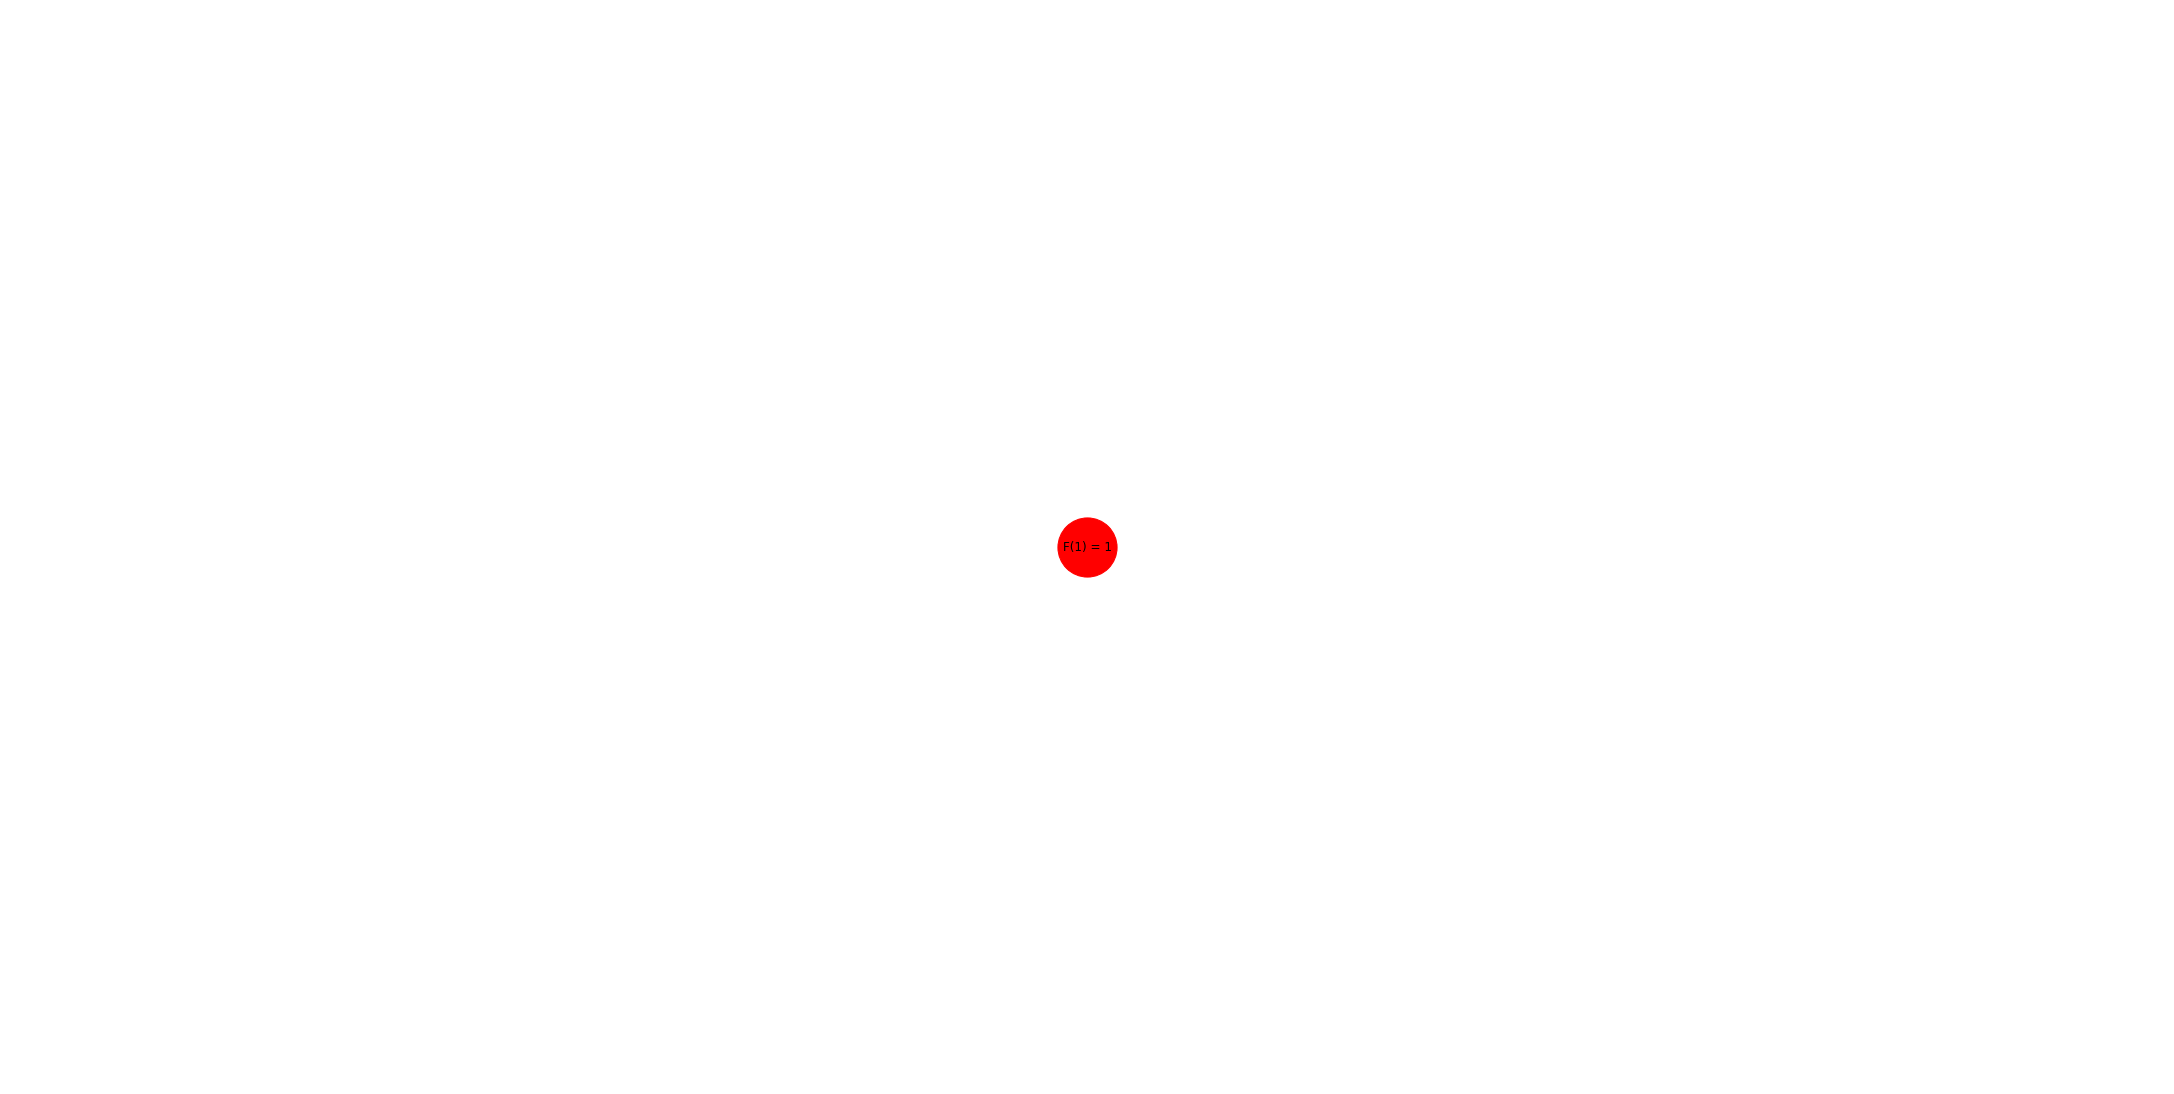

In [ ]:
draw_graph(1)

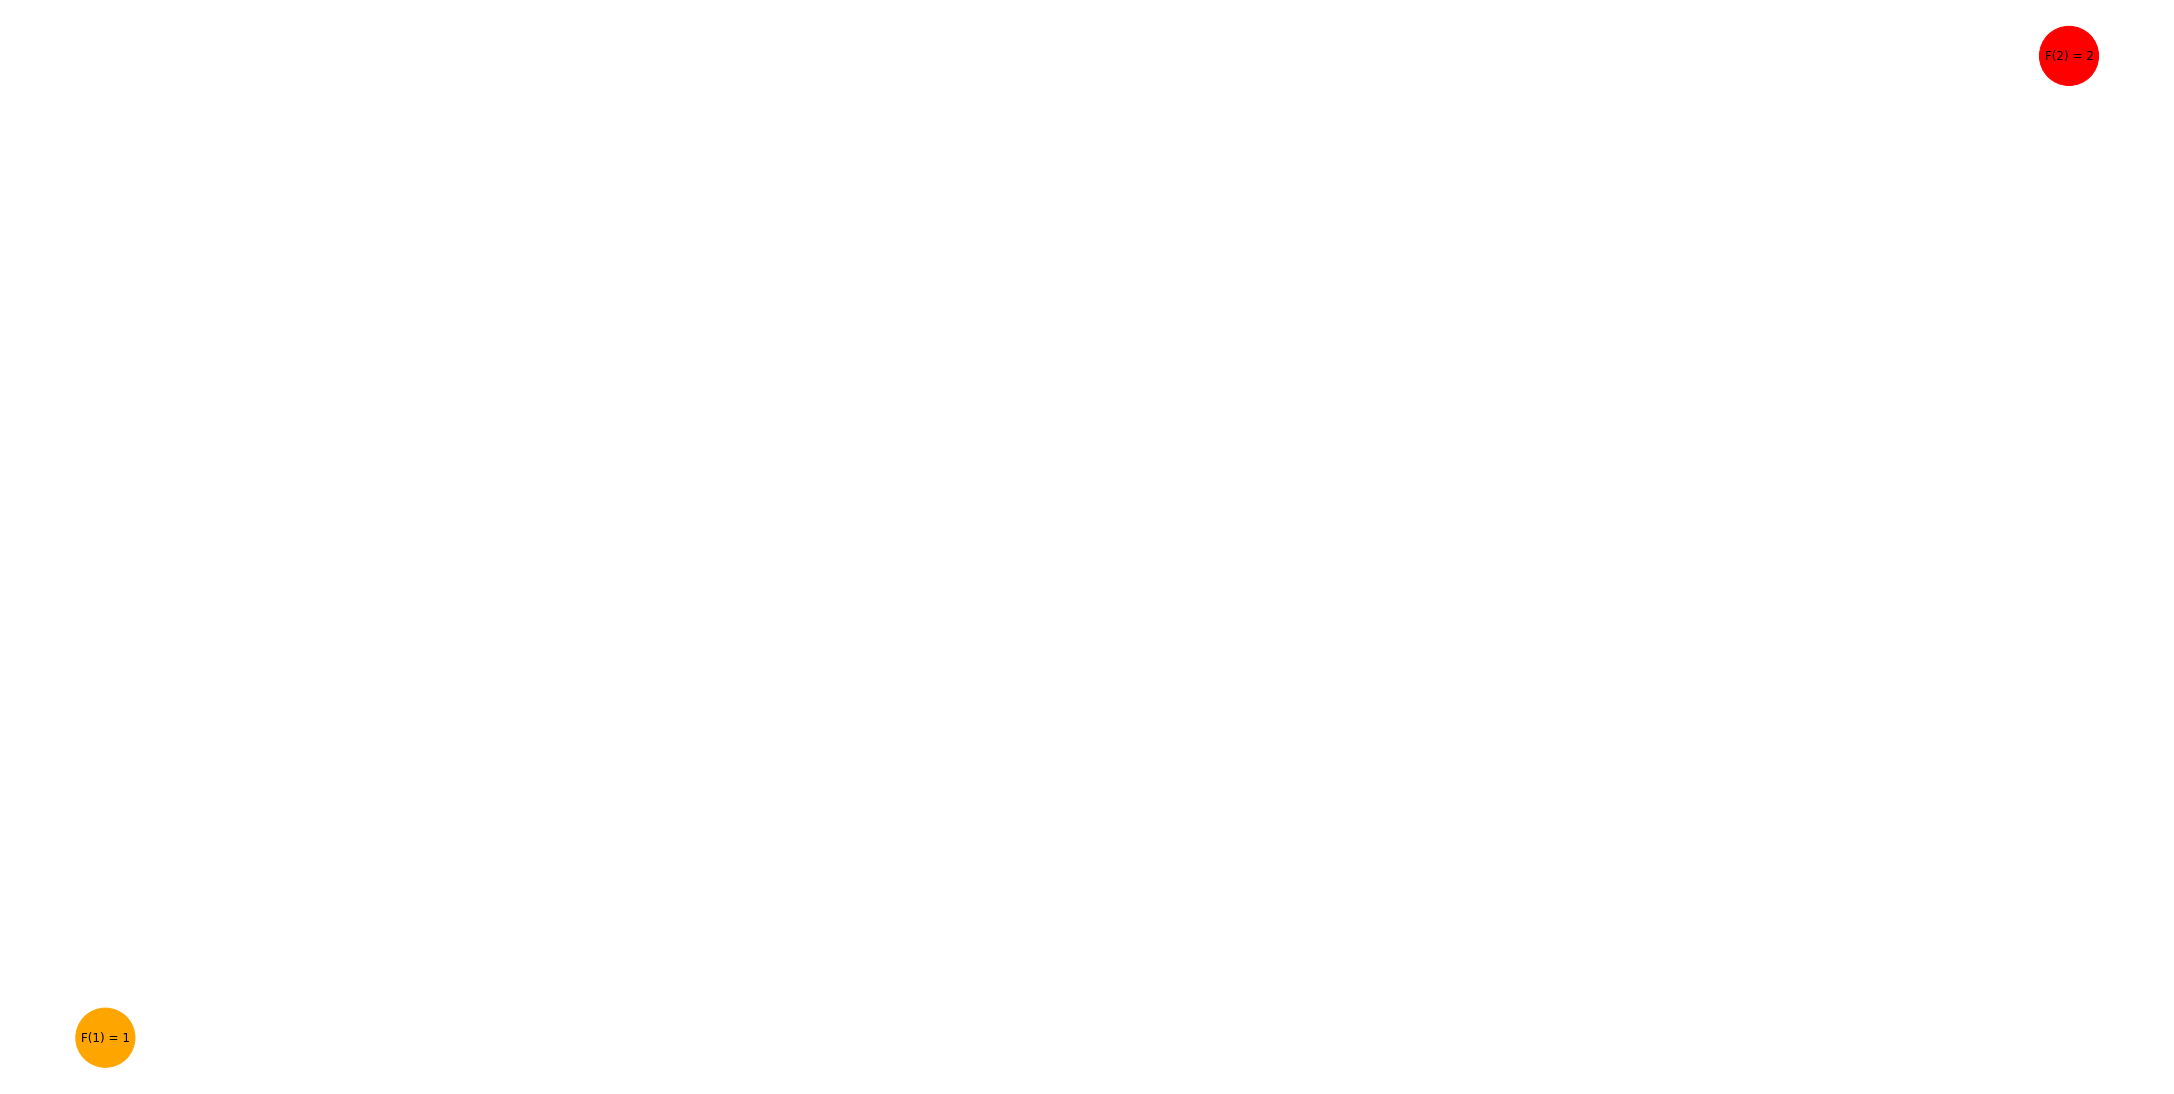

In [ ]:
draw_graph(2)

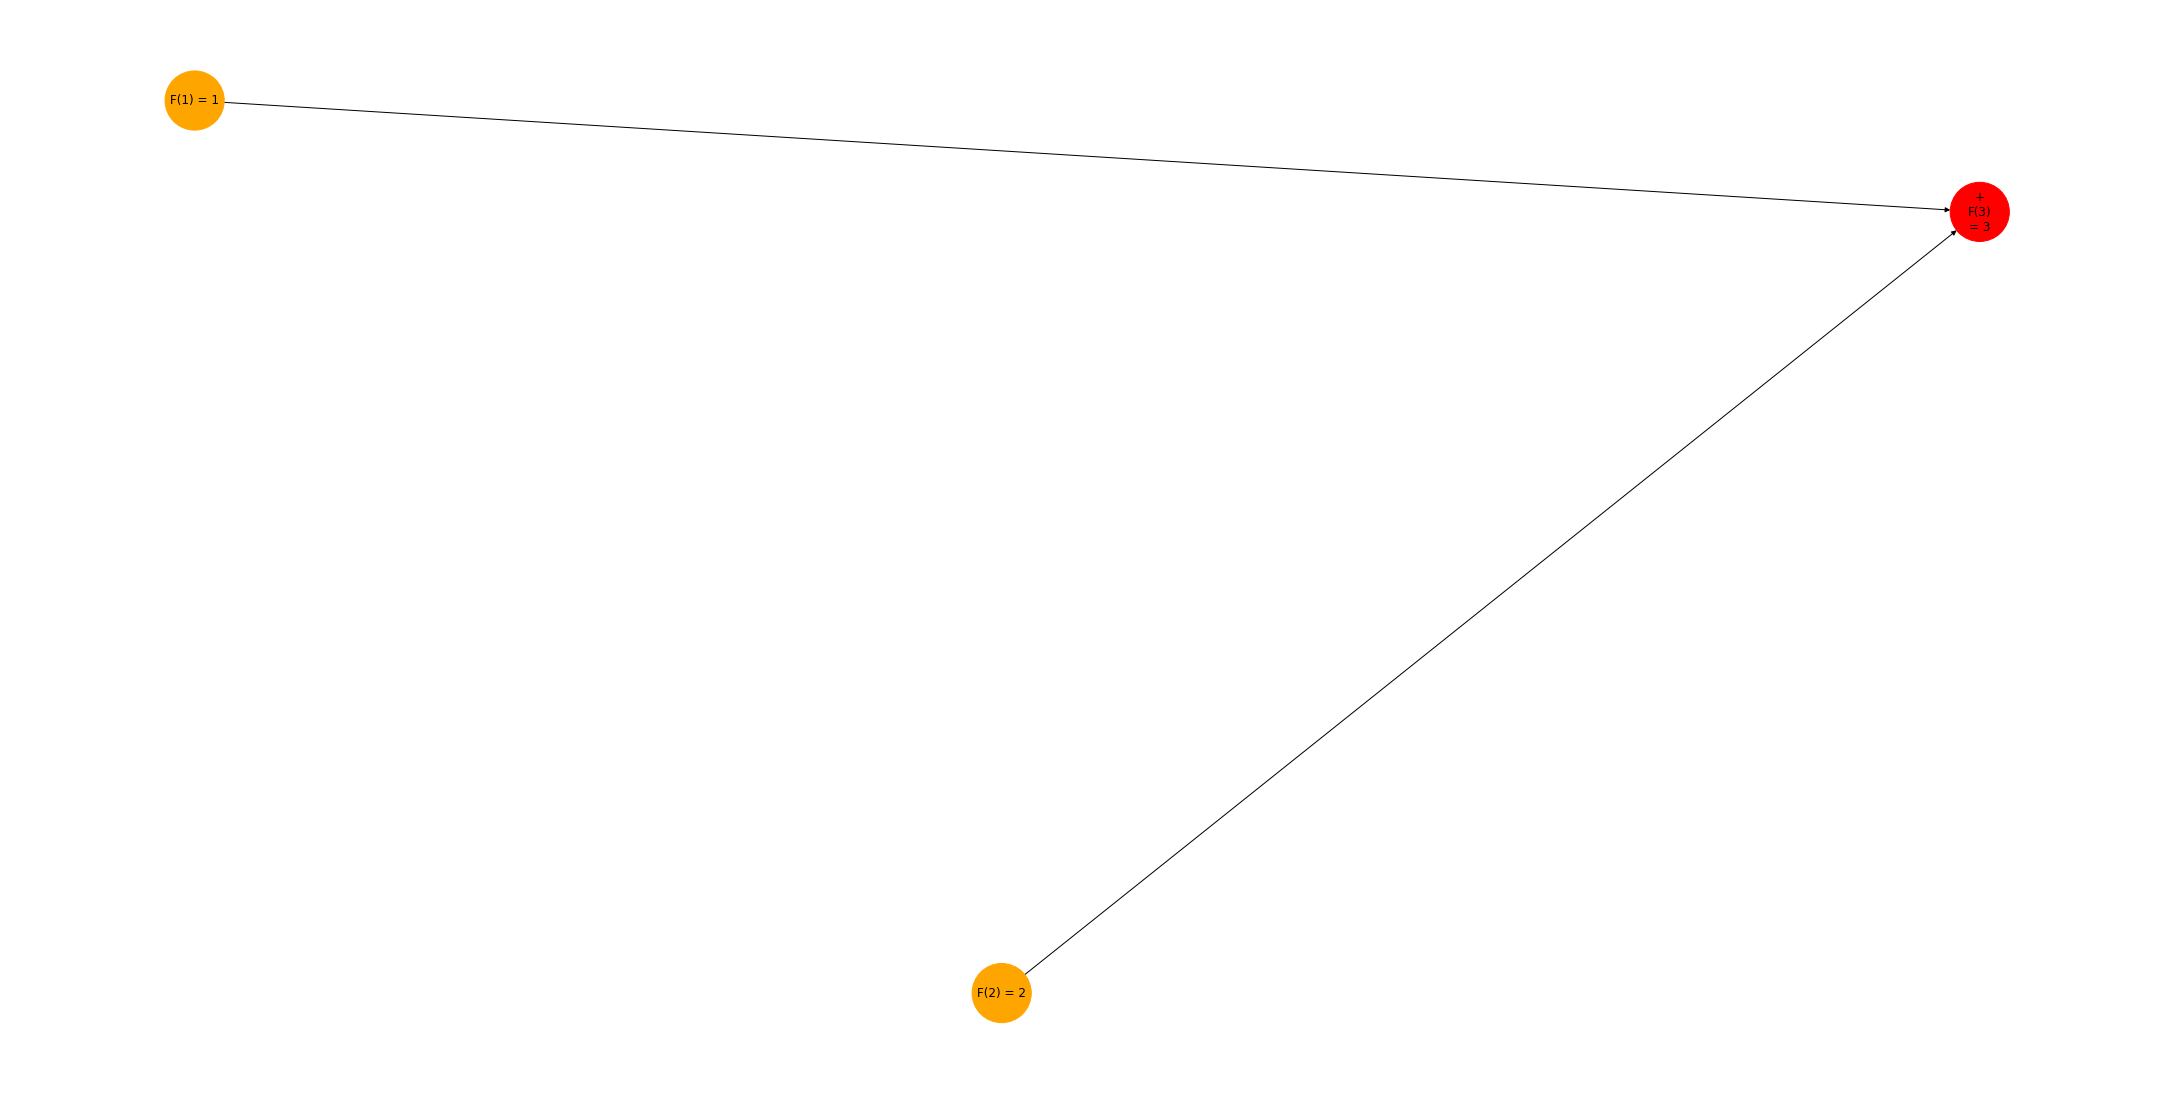

In [ ]:
draw_graph(3)

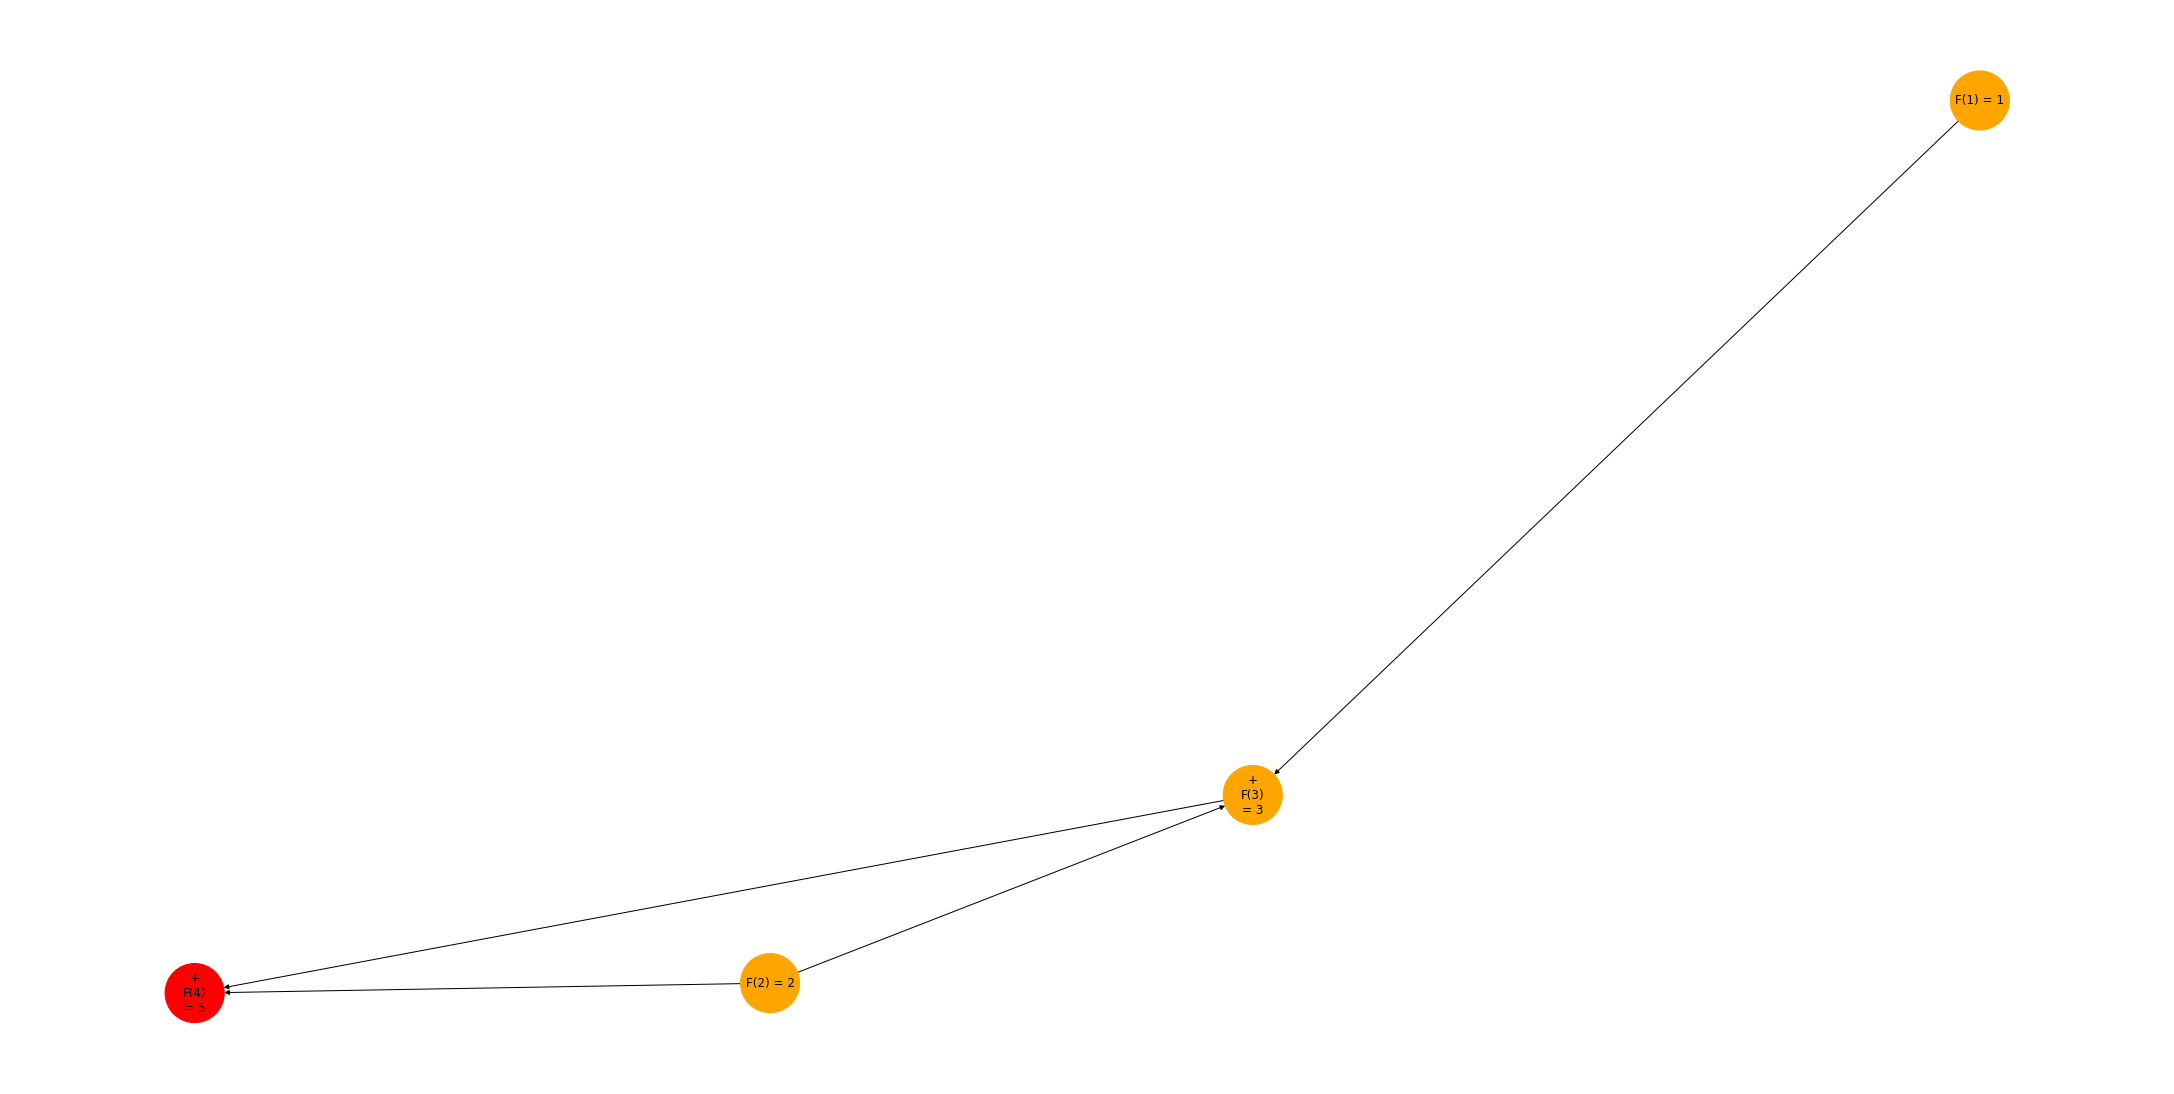

In [ ]:
draw_graph(4)

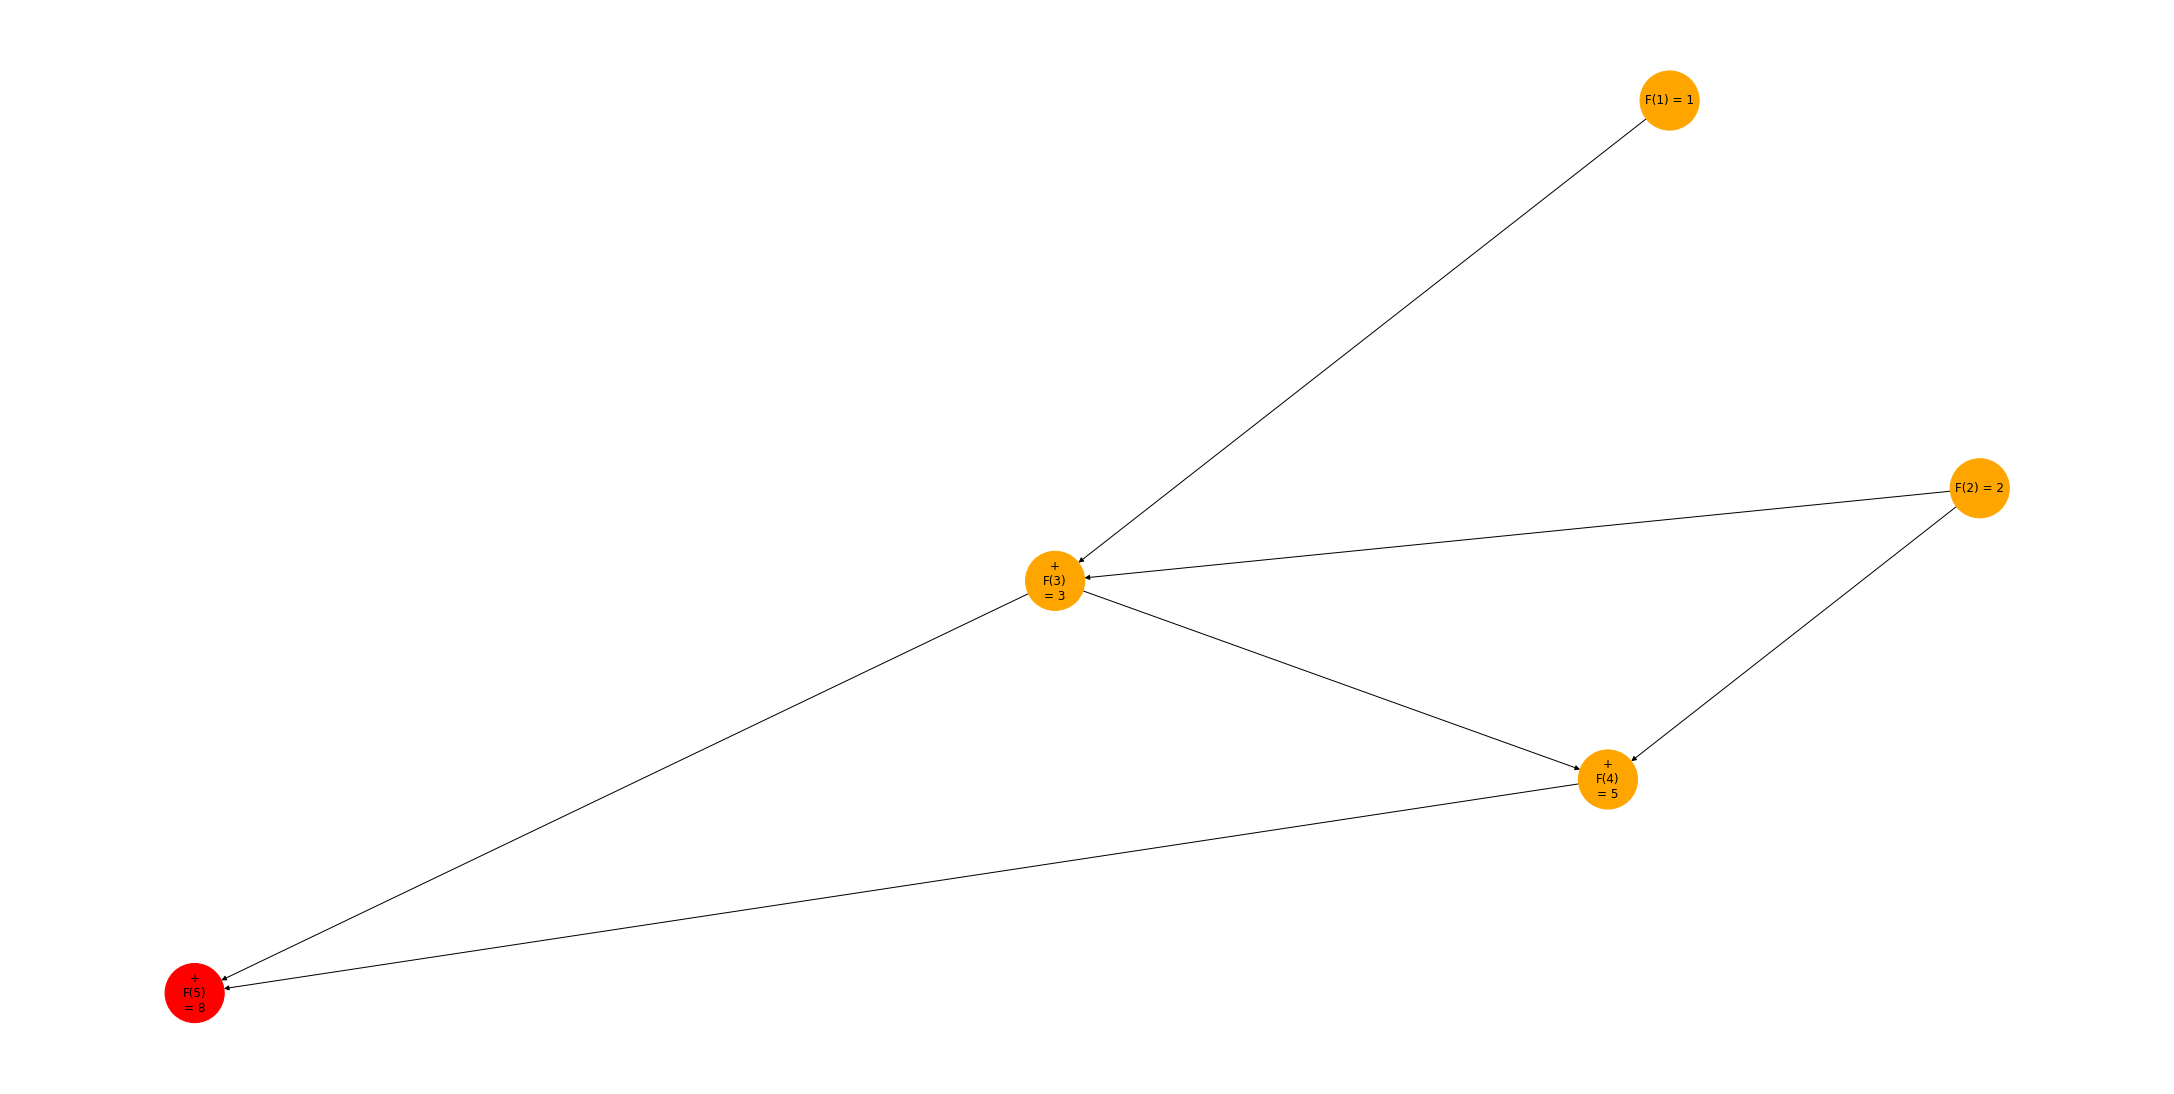

In [ ]:
draw_graph(5)

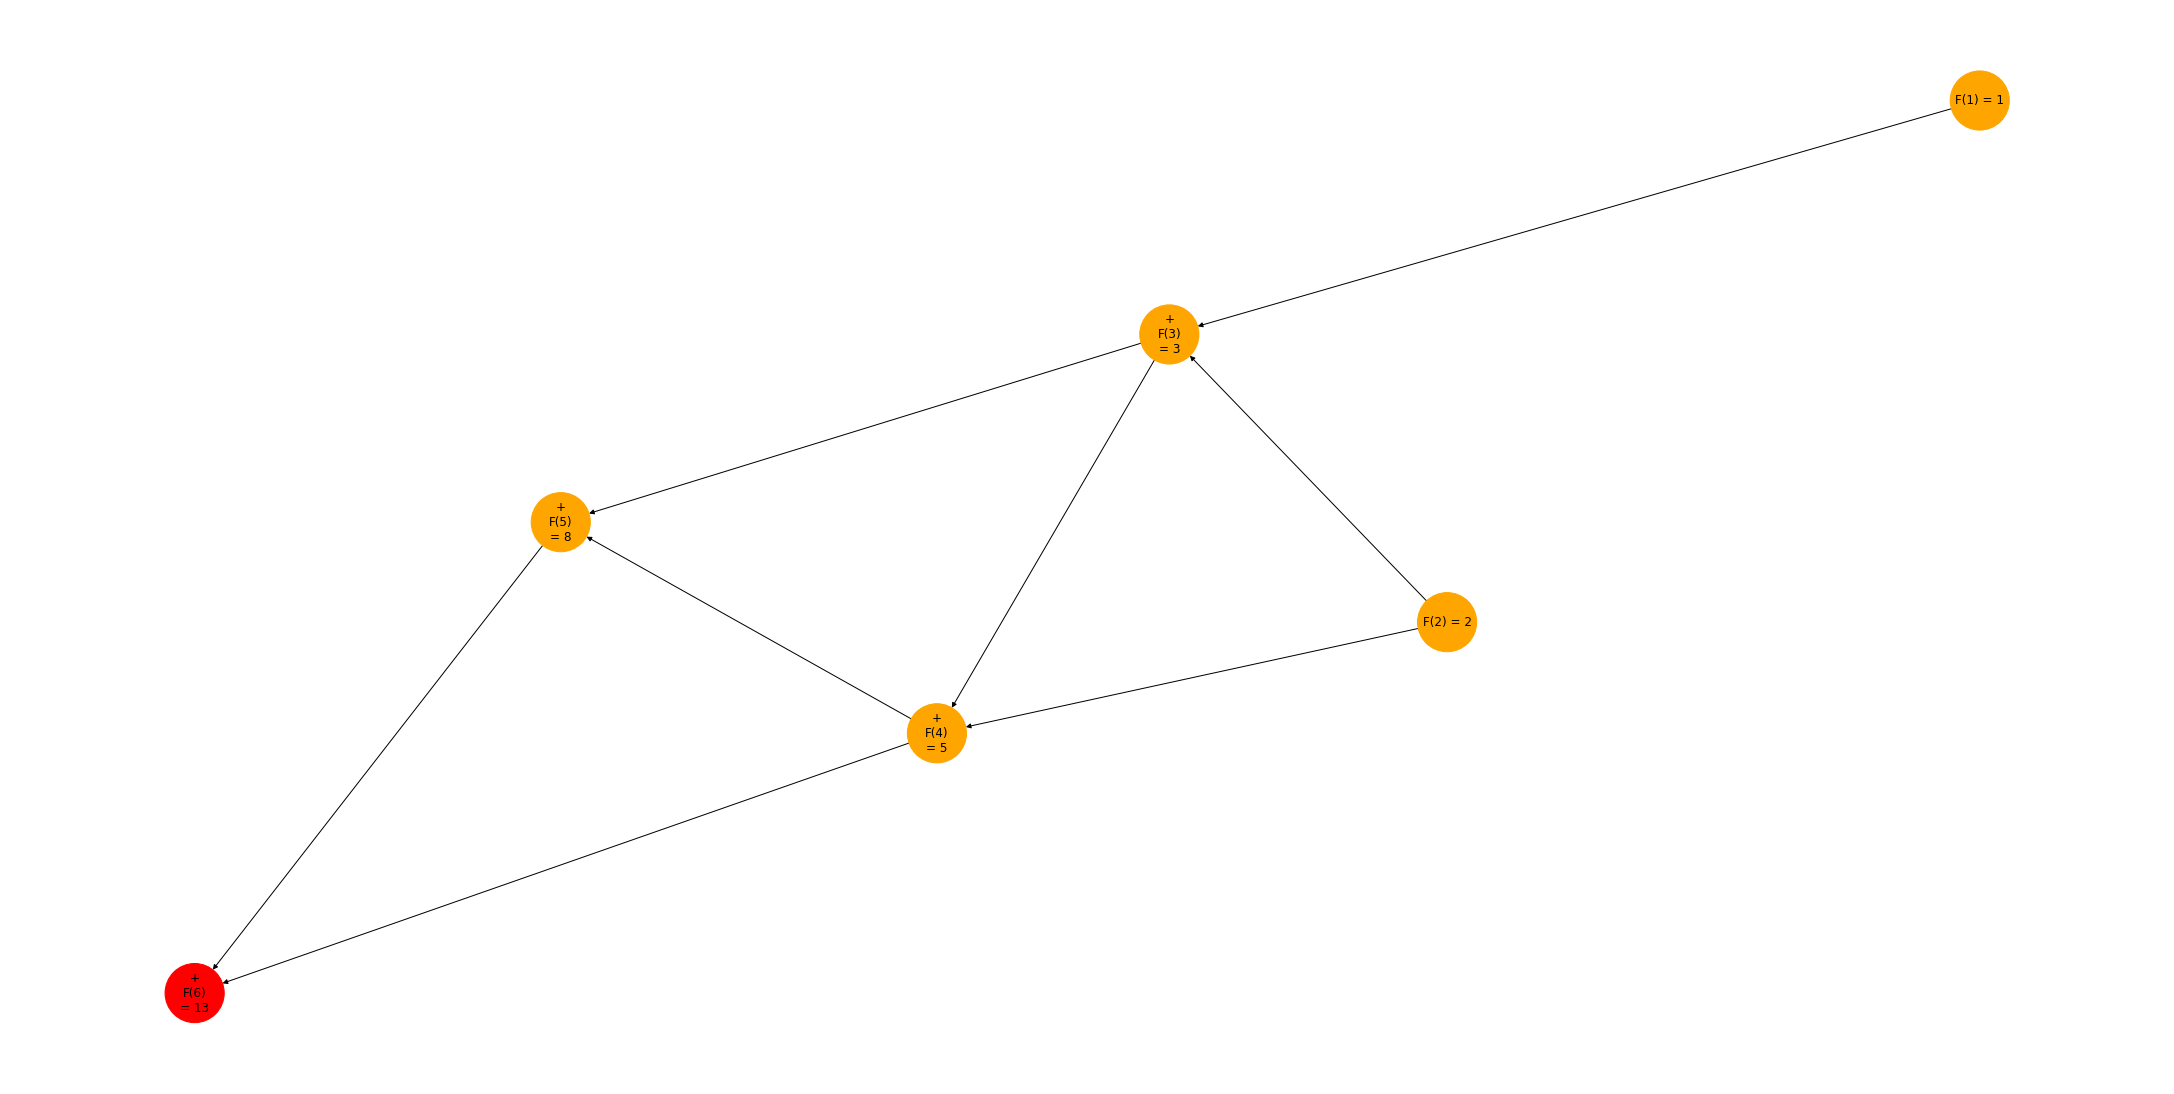

In [ ]:
draw_graph(6)

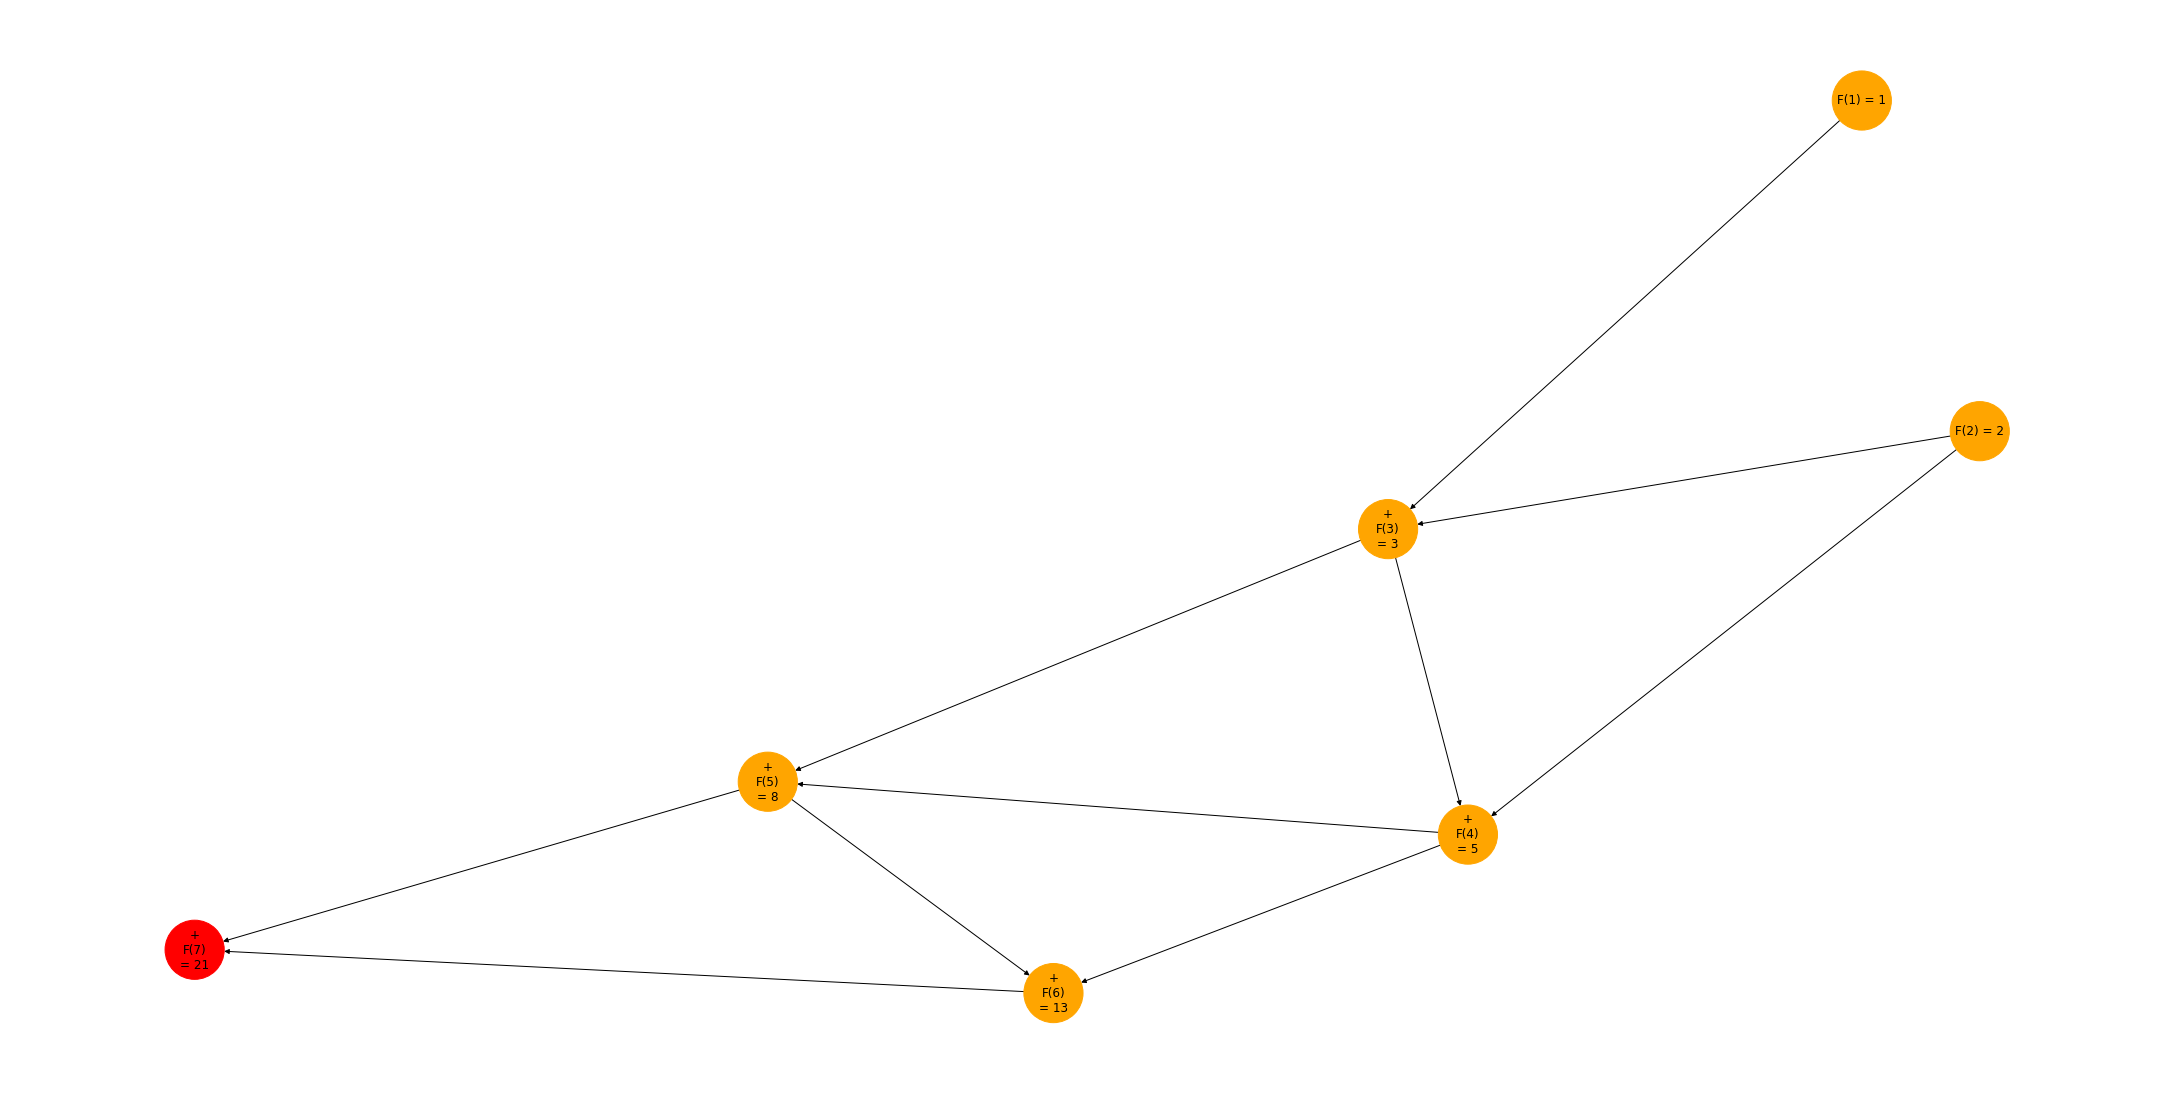

In [ ]:
draw_graph(7)

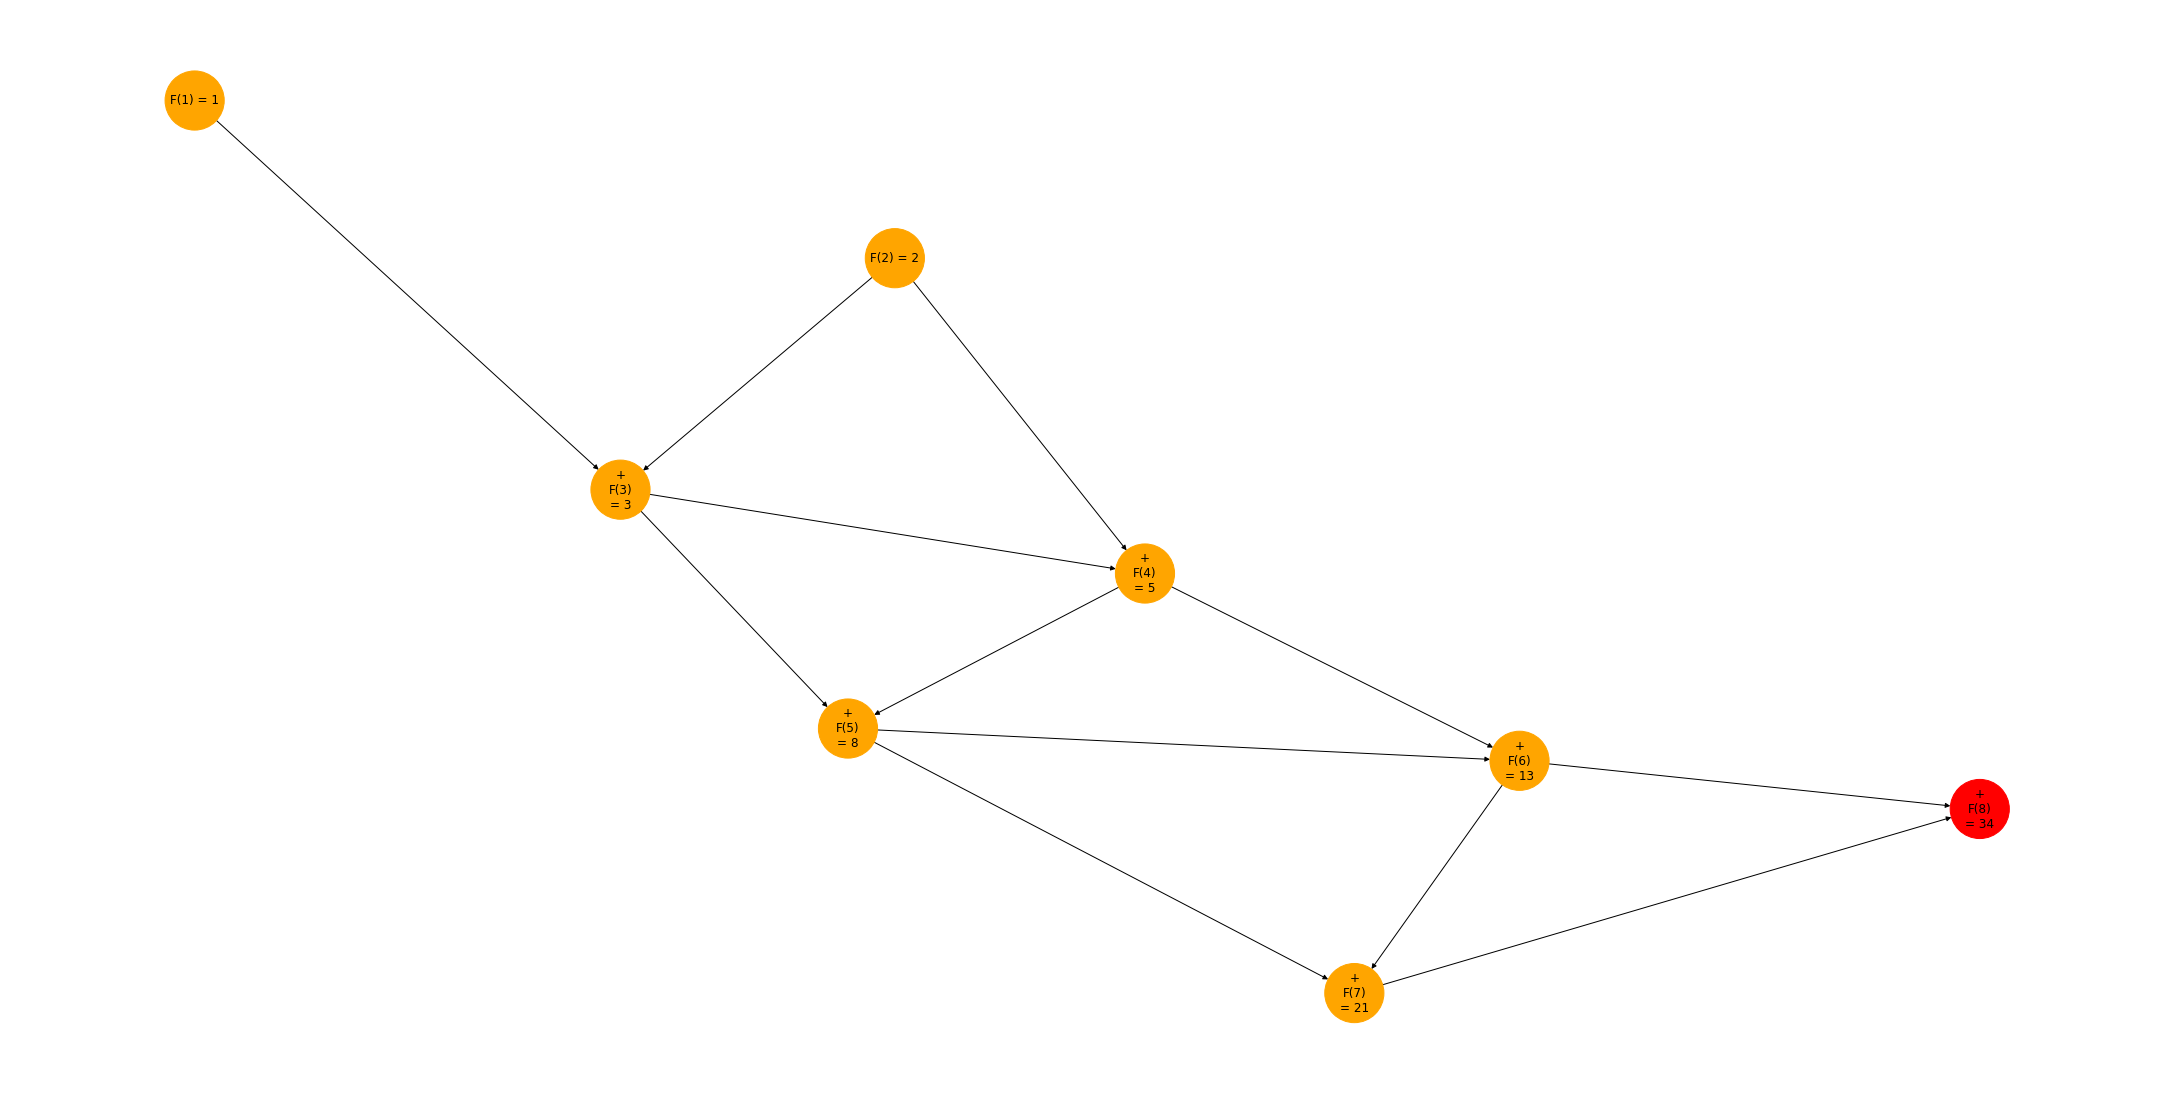

In [ ]:
draw_graph(8)

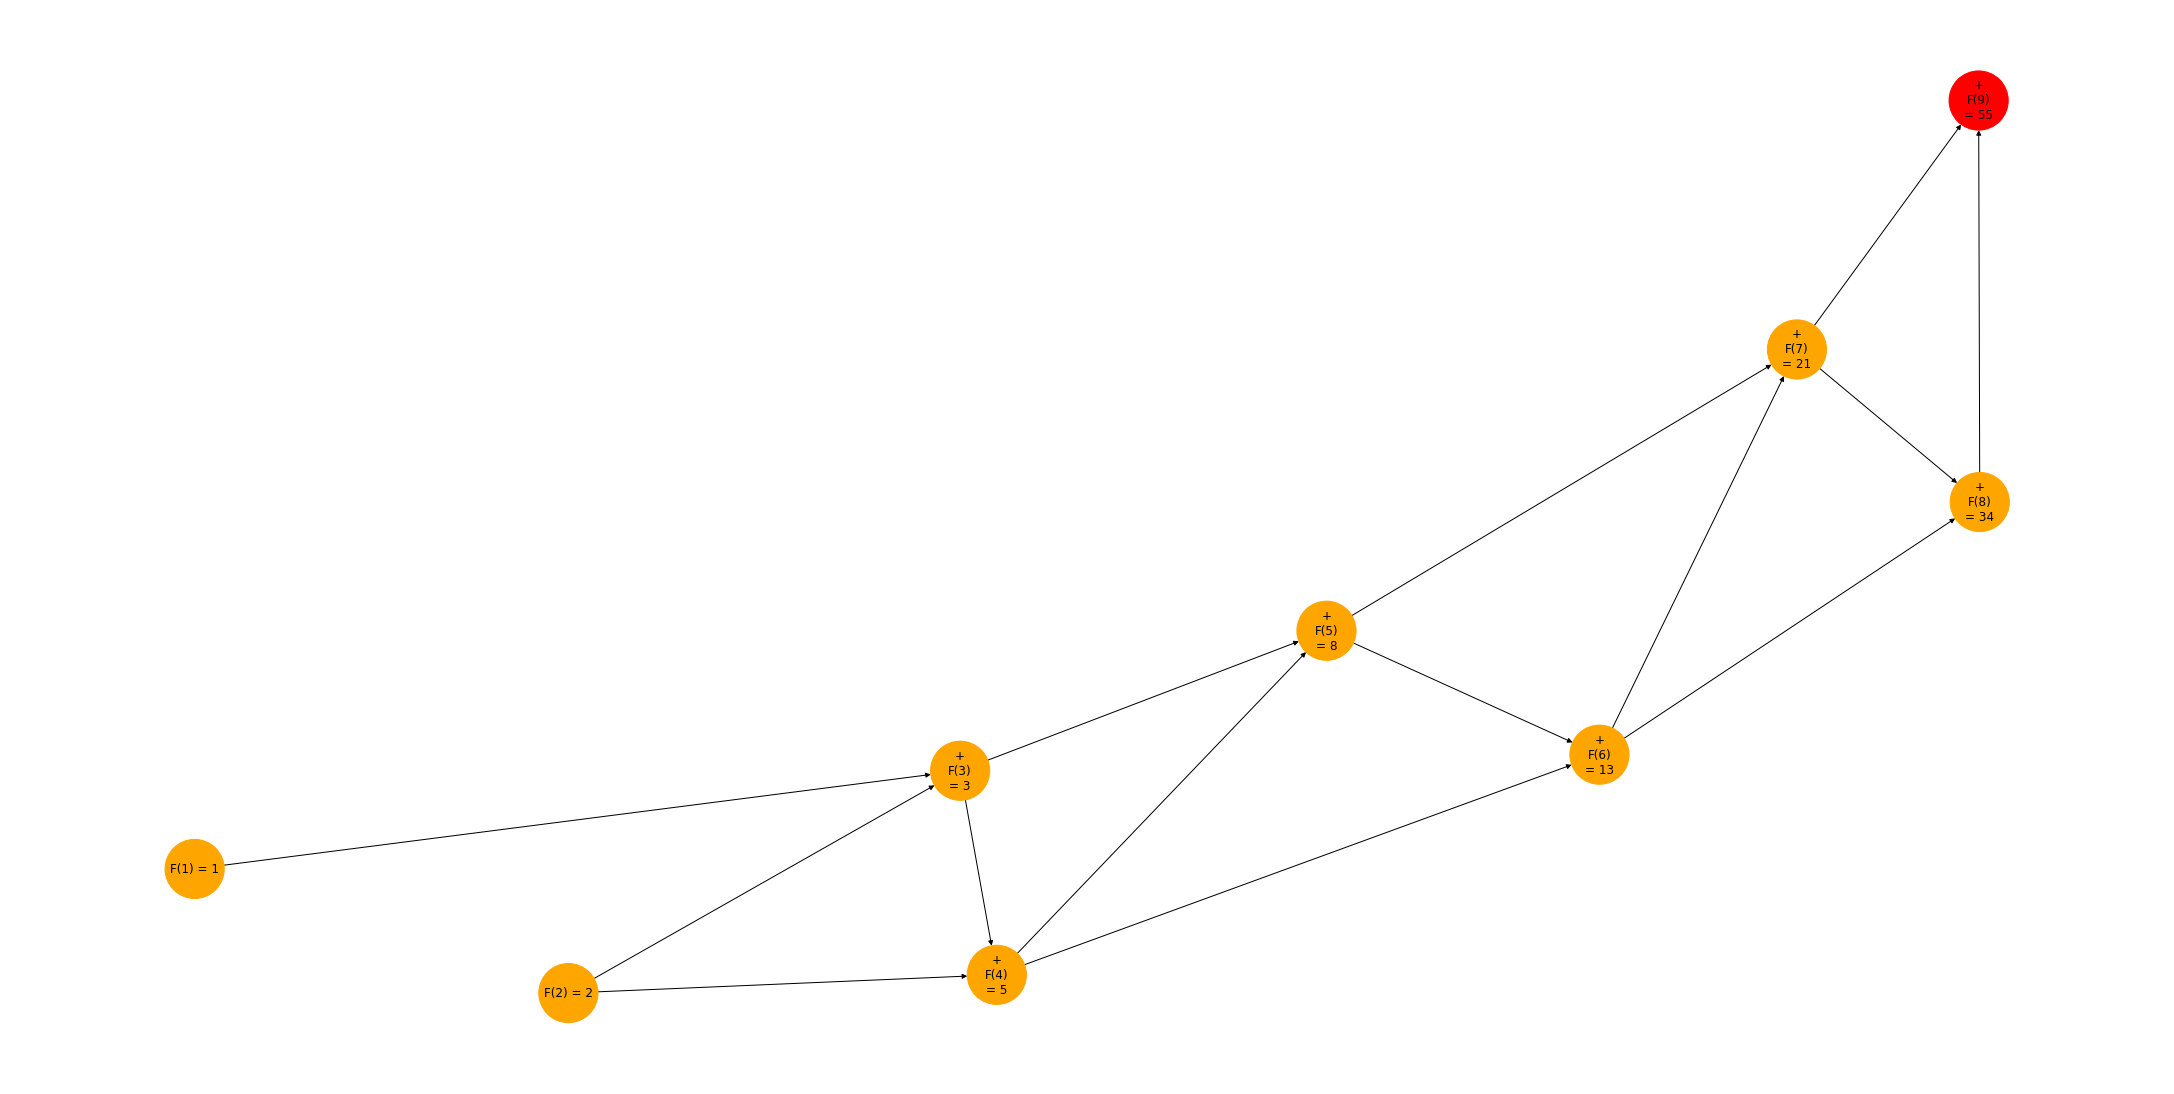

In [ ]:
draw_graph(9)

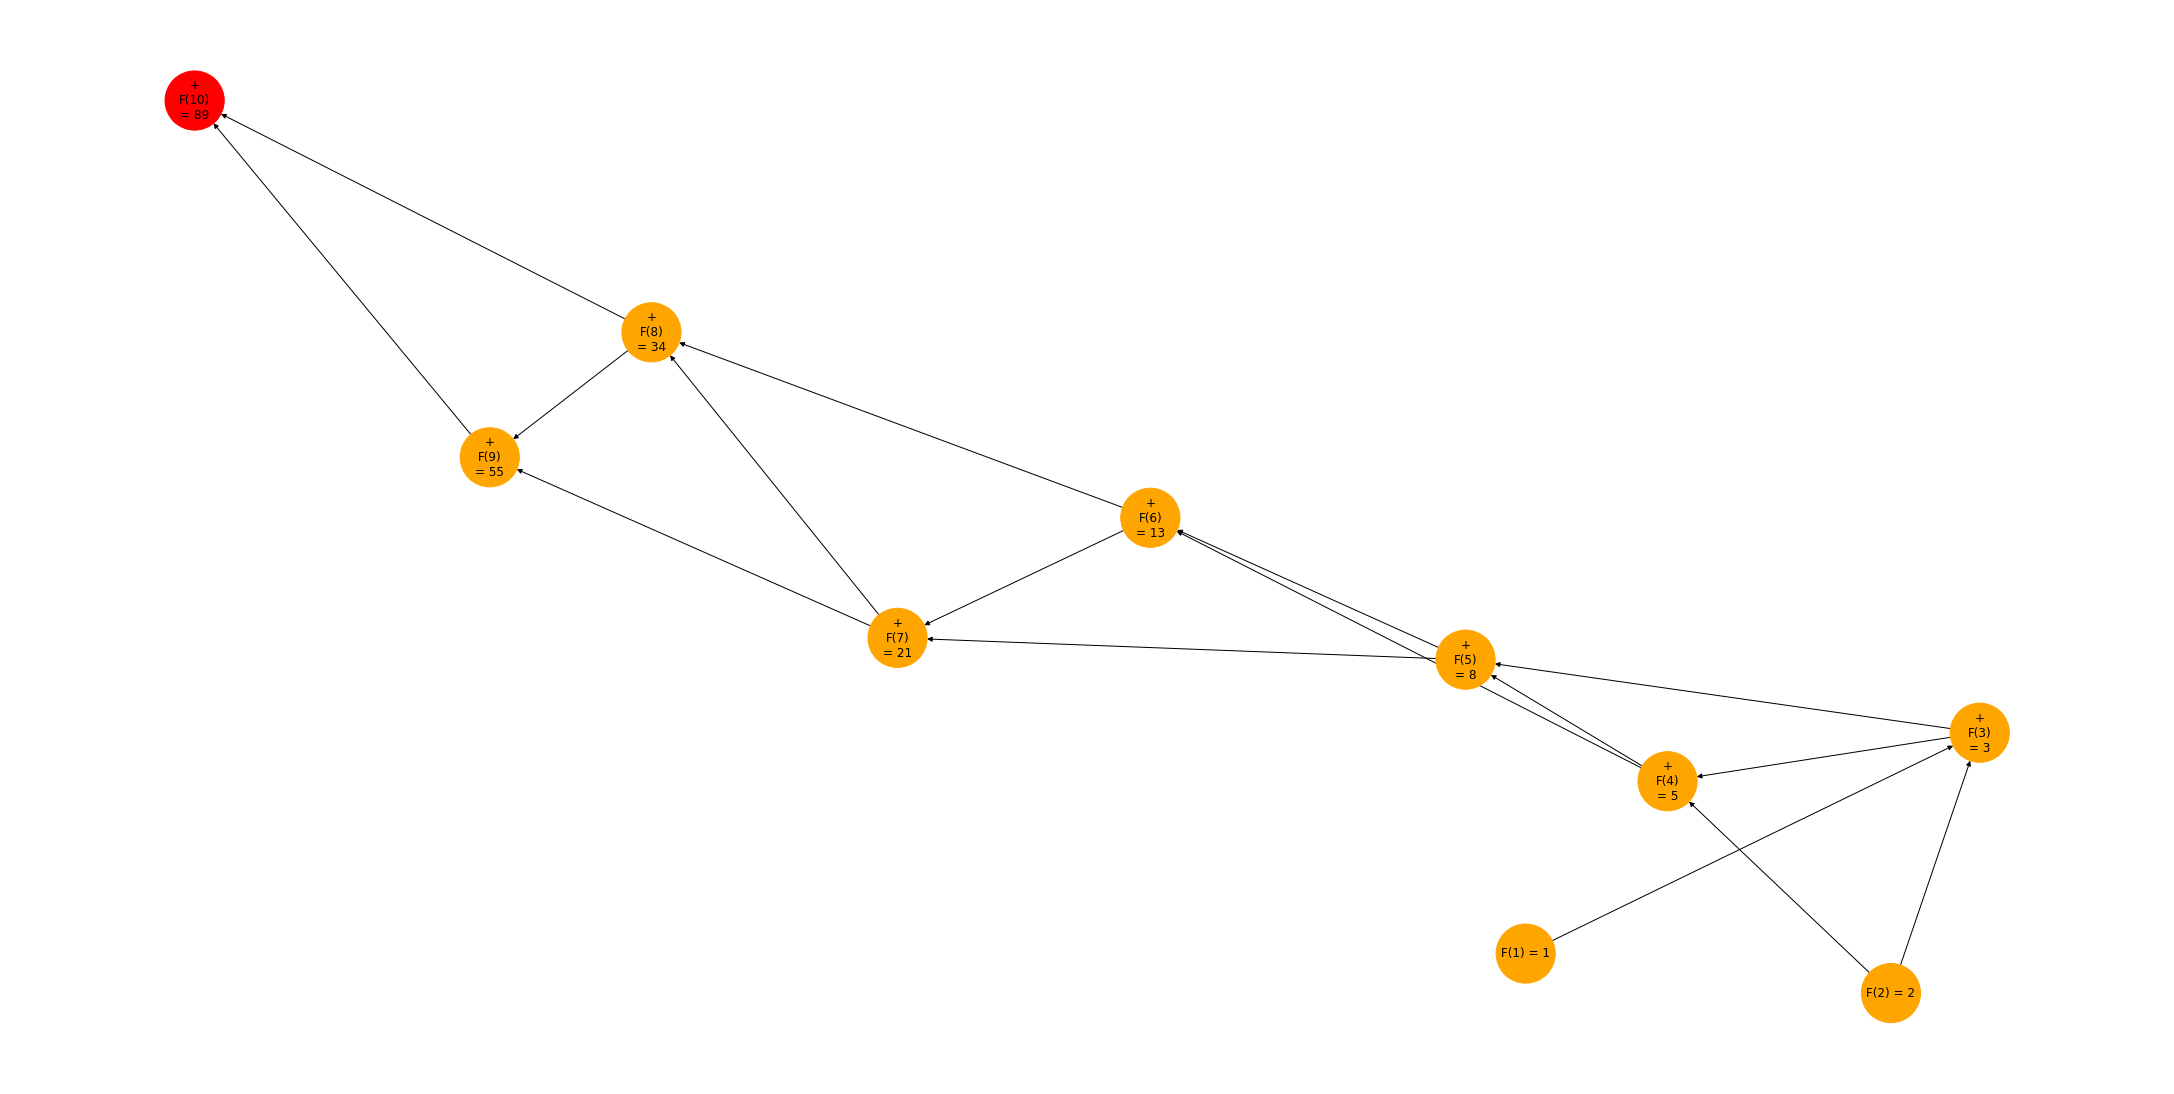

In [ ]:
draw_graph(10)

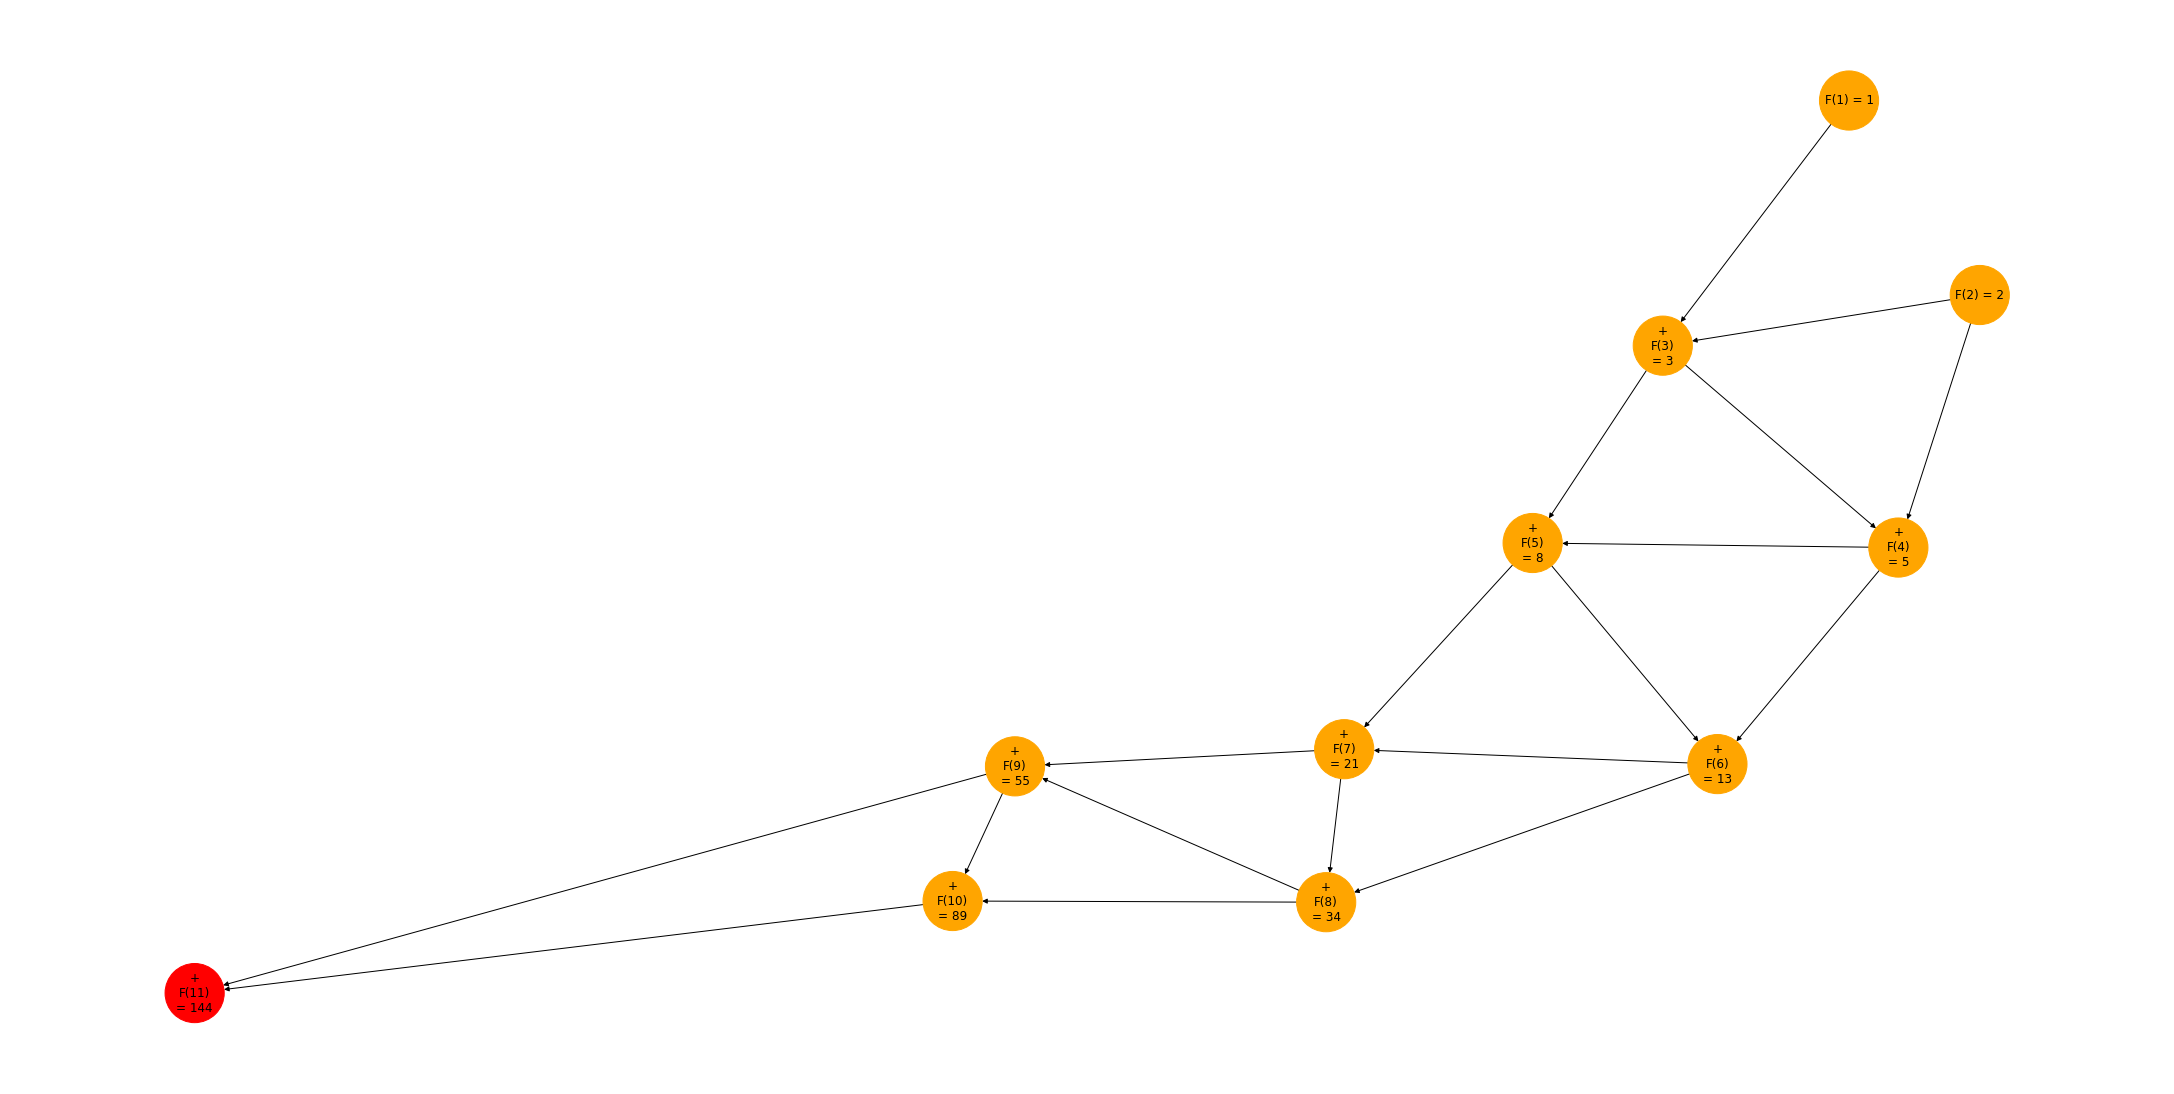

In [ ]:
draw_graph(11)

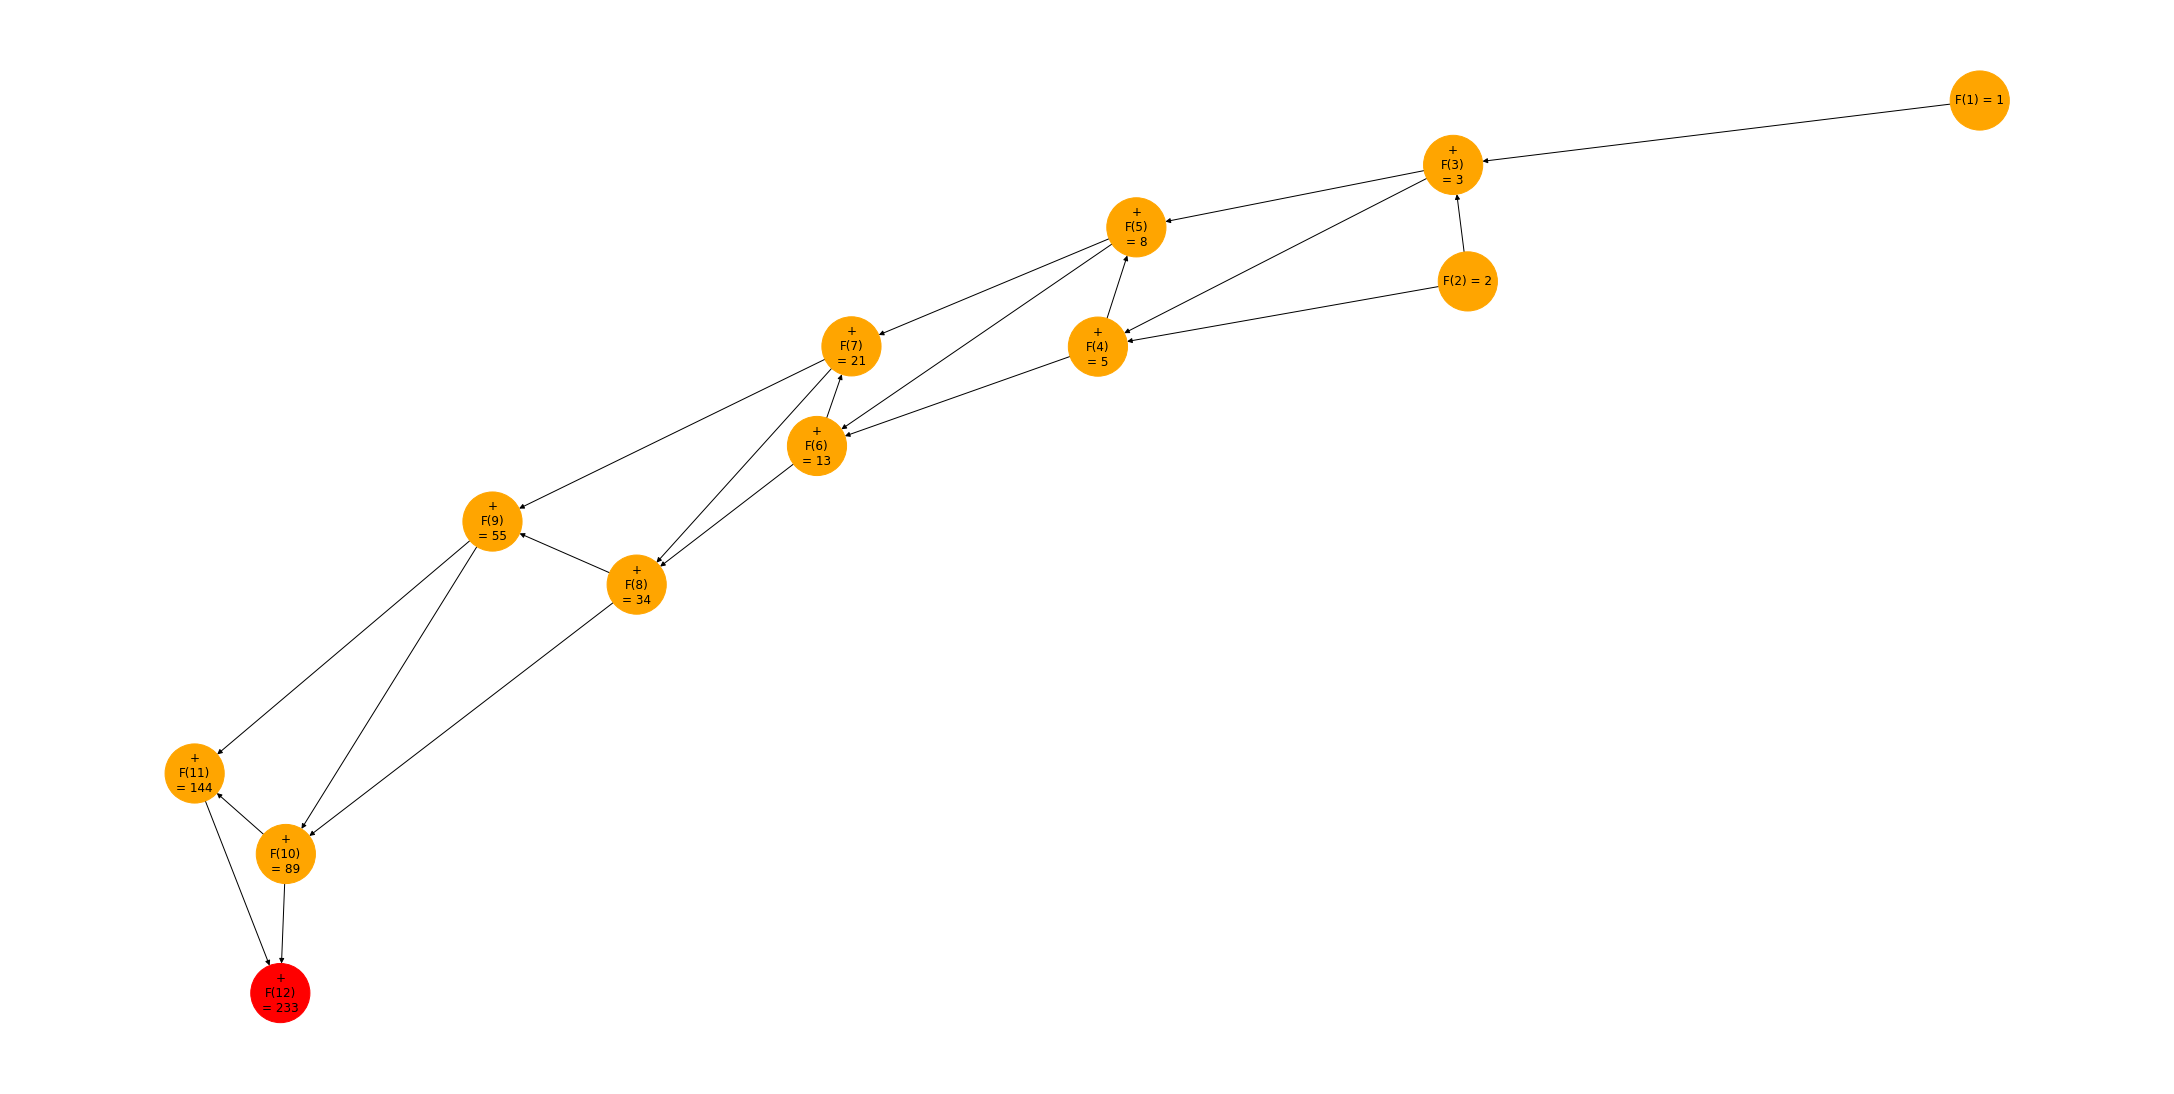

In [ ]:
draw_graph(12)

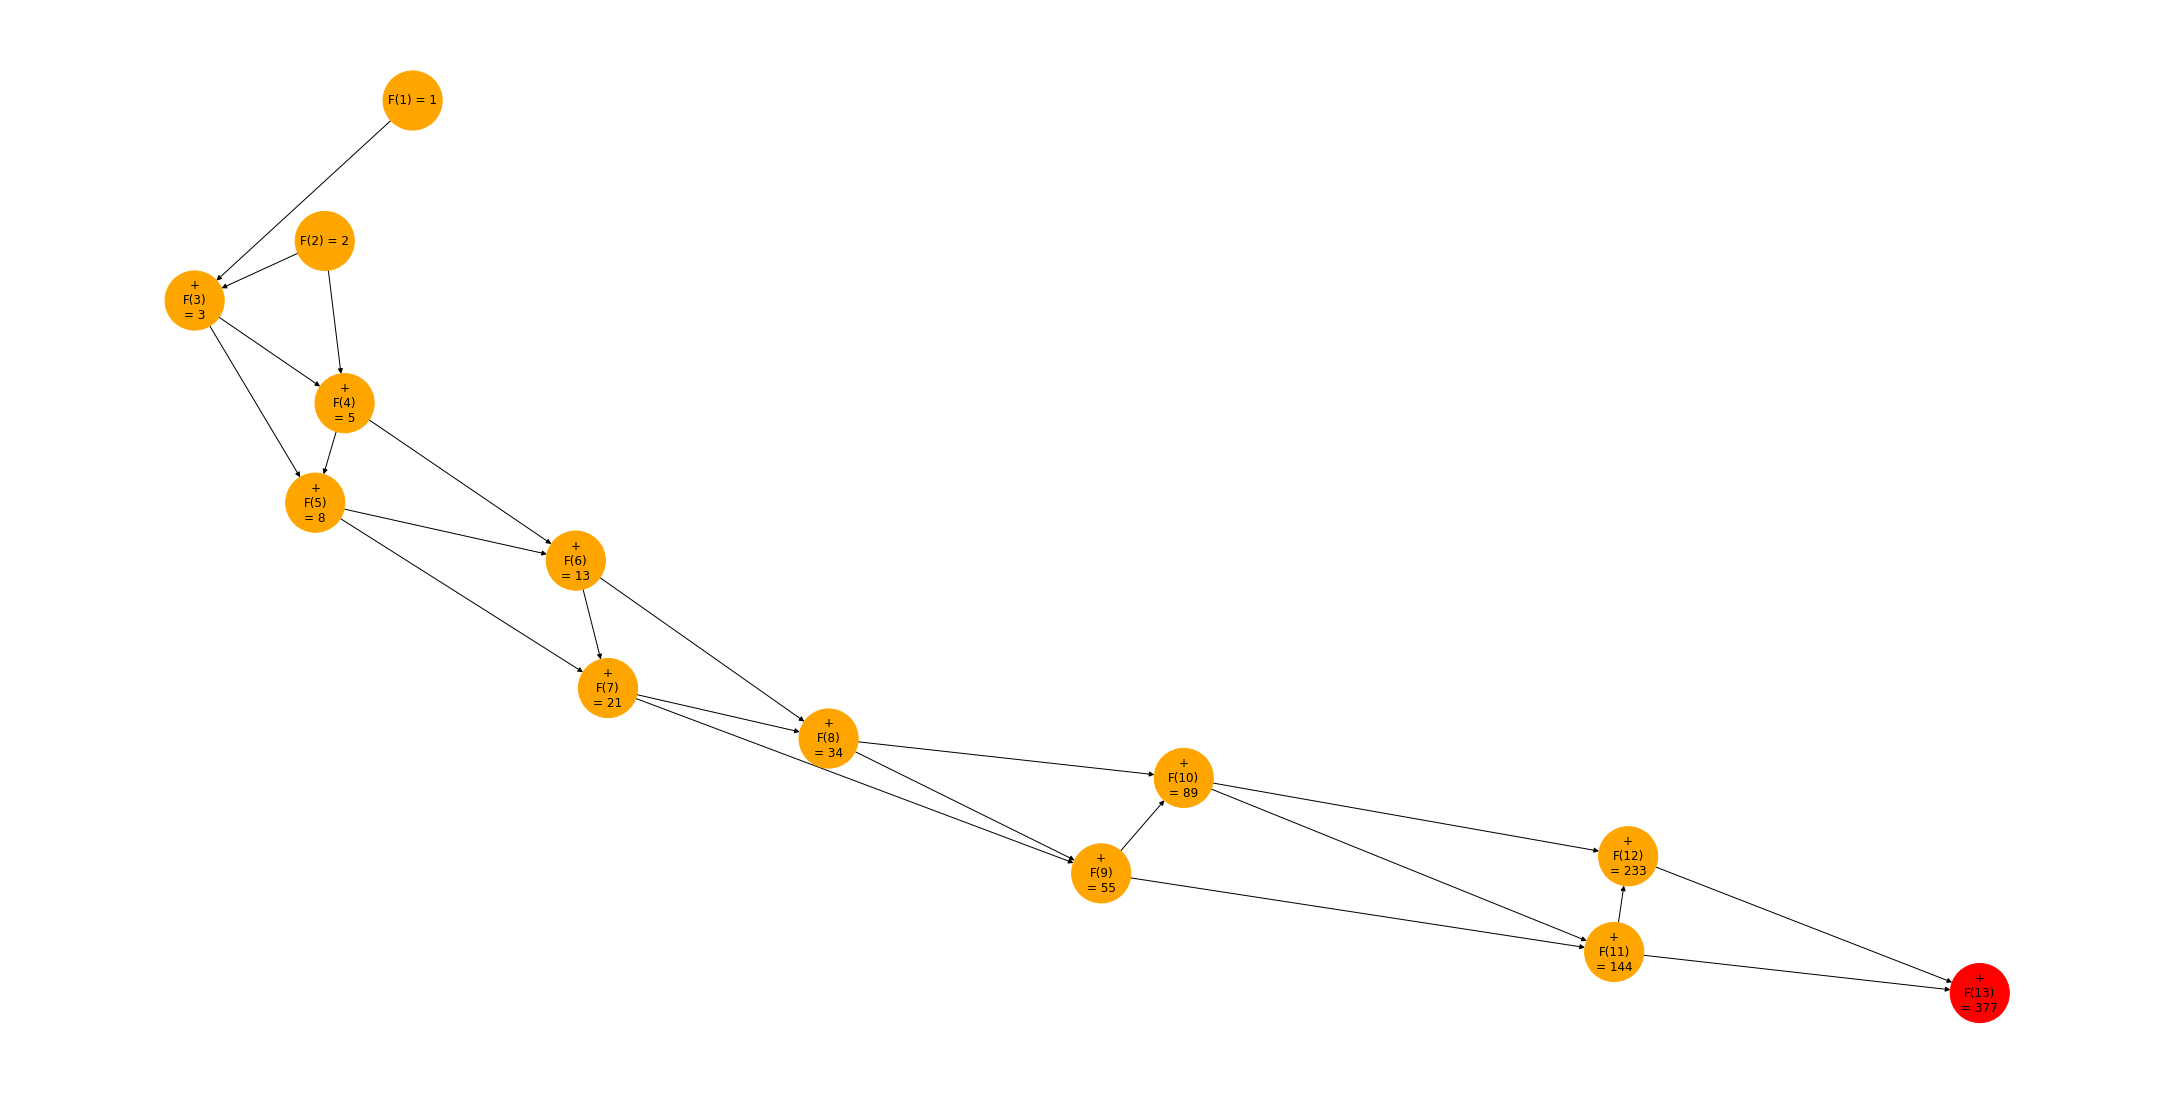

In [ ]:
draw_graph(13)

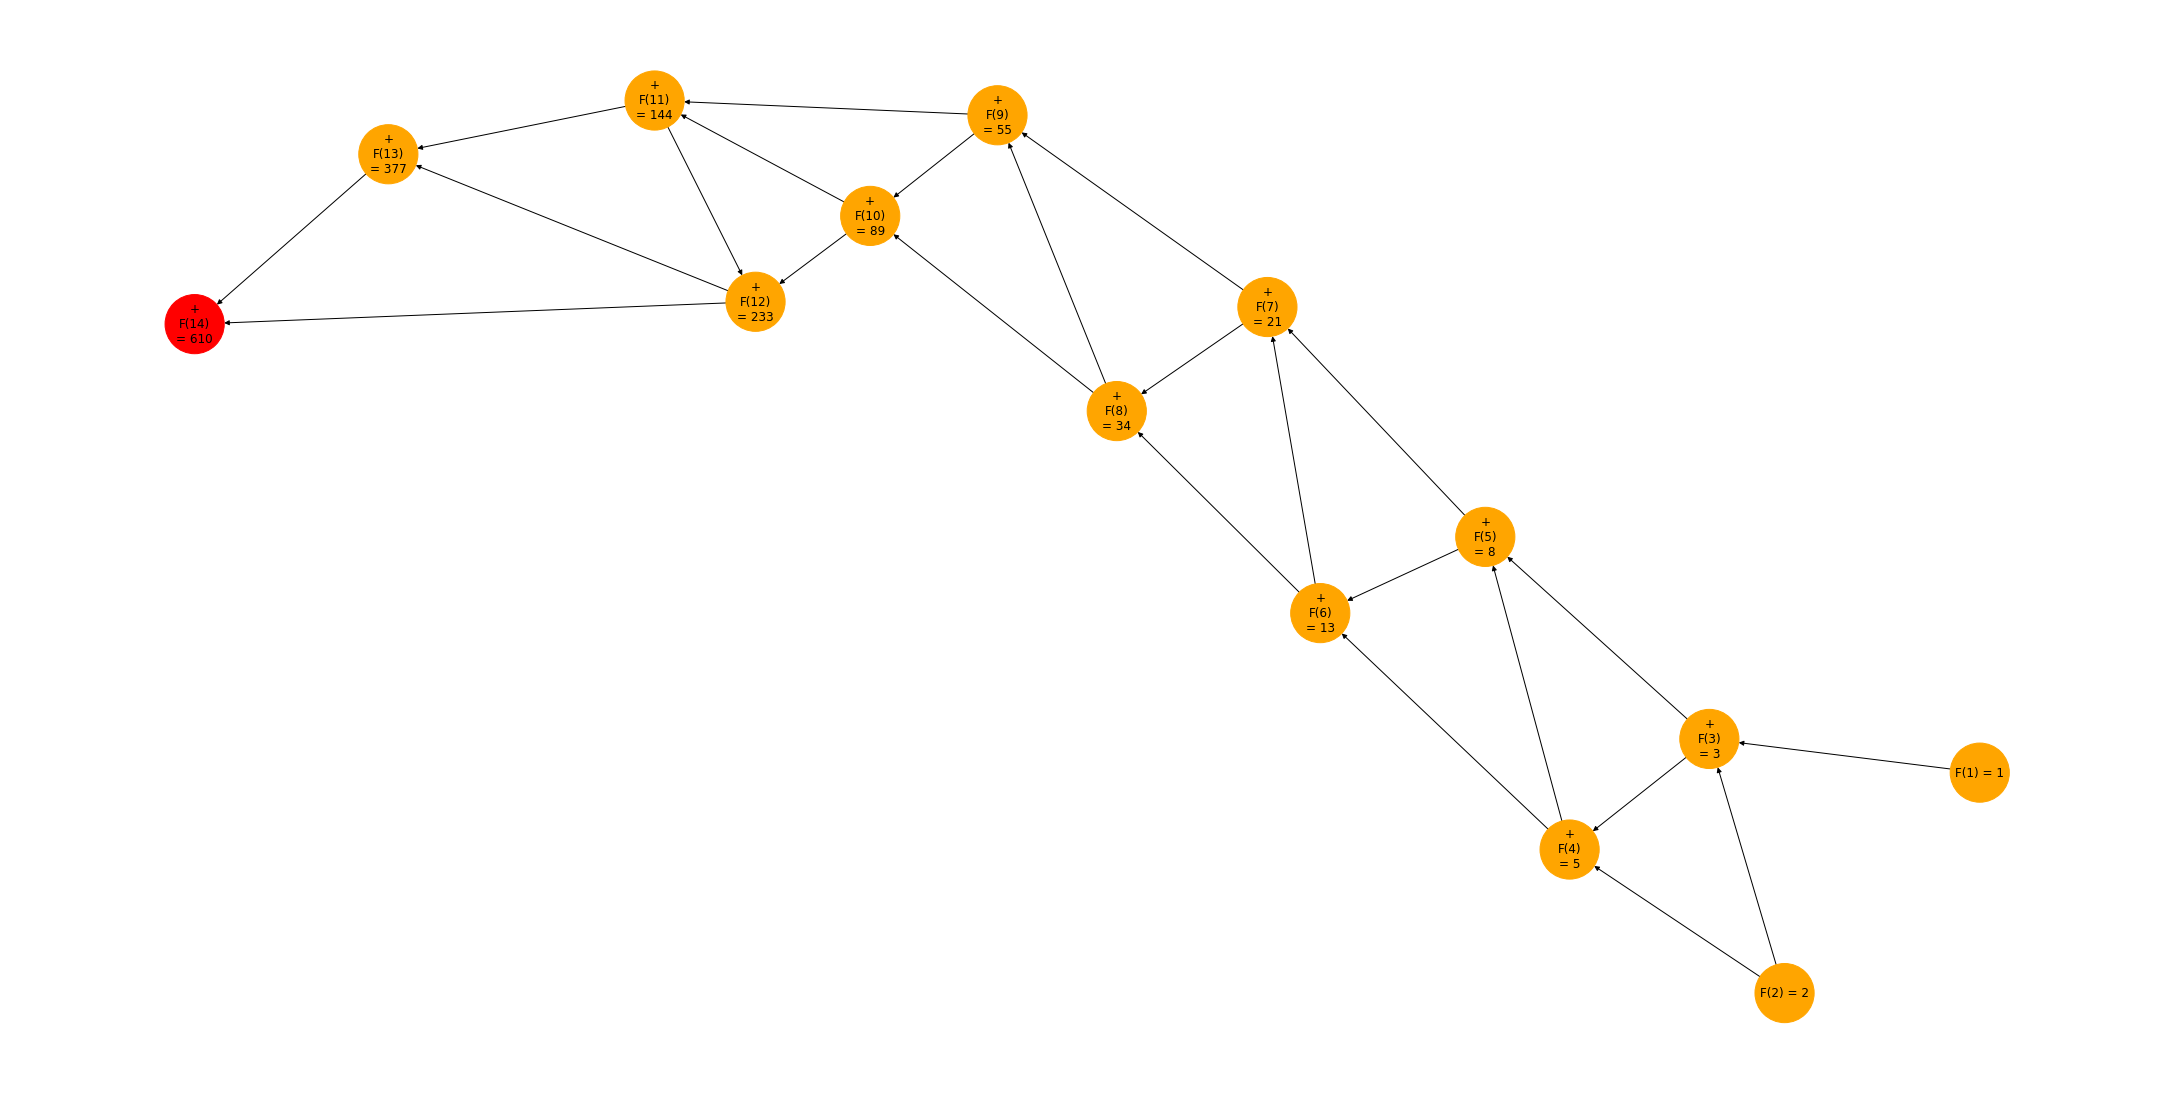

In [ ]:
draw_graph(14)

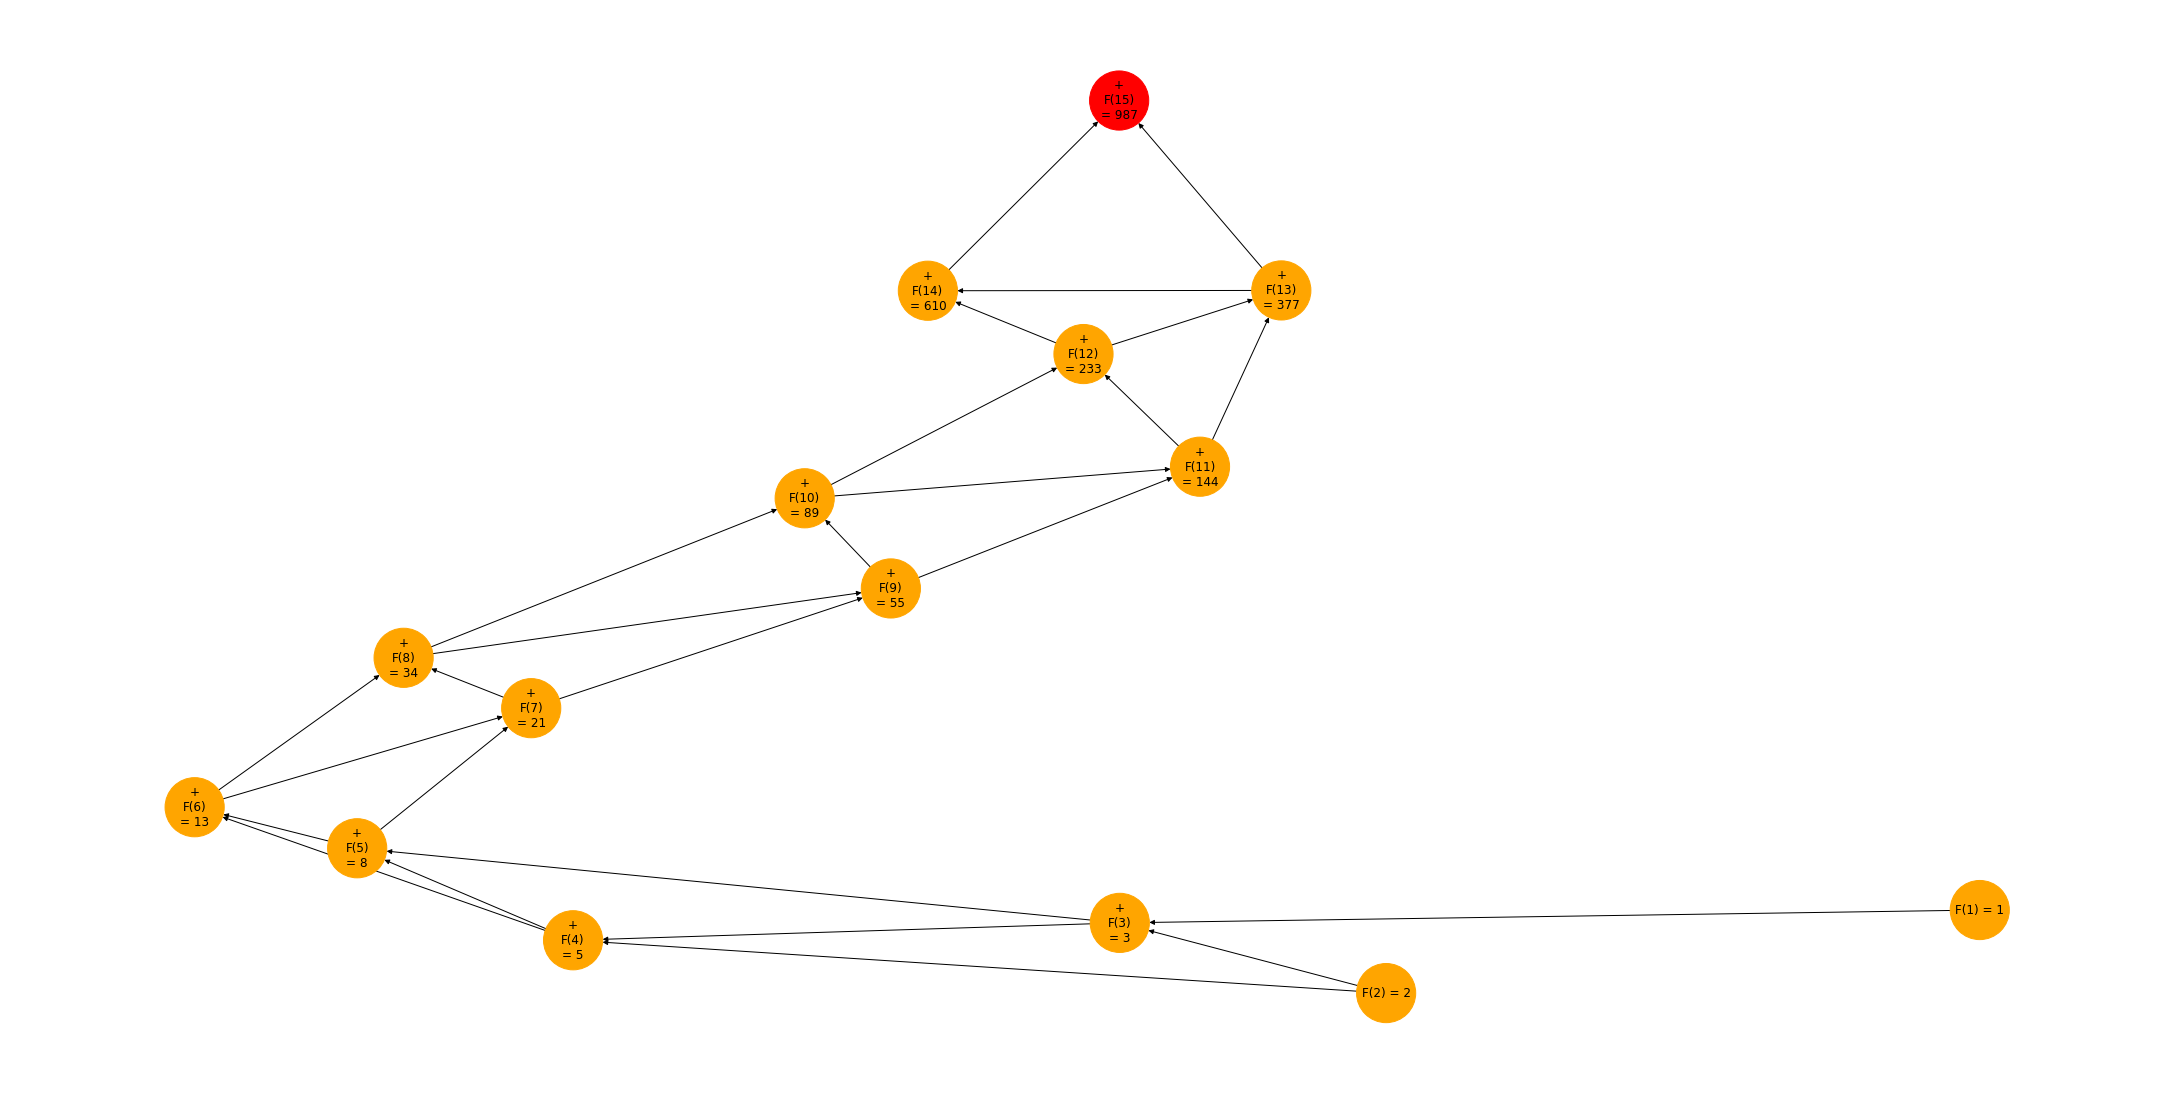

In [ ]:
draw_graph(15)

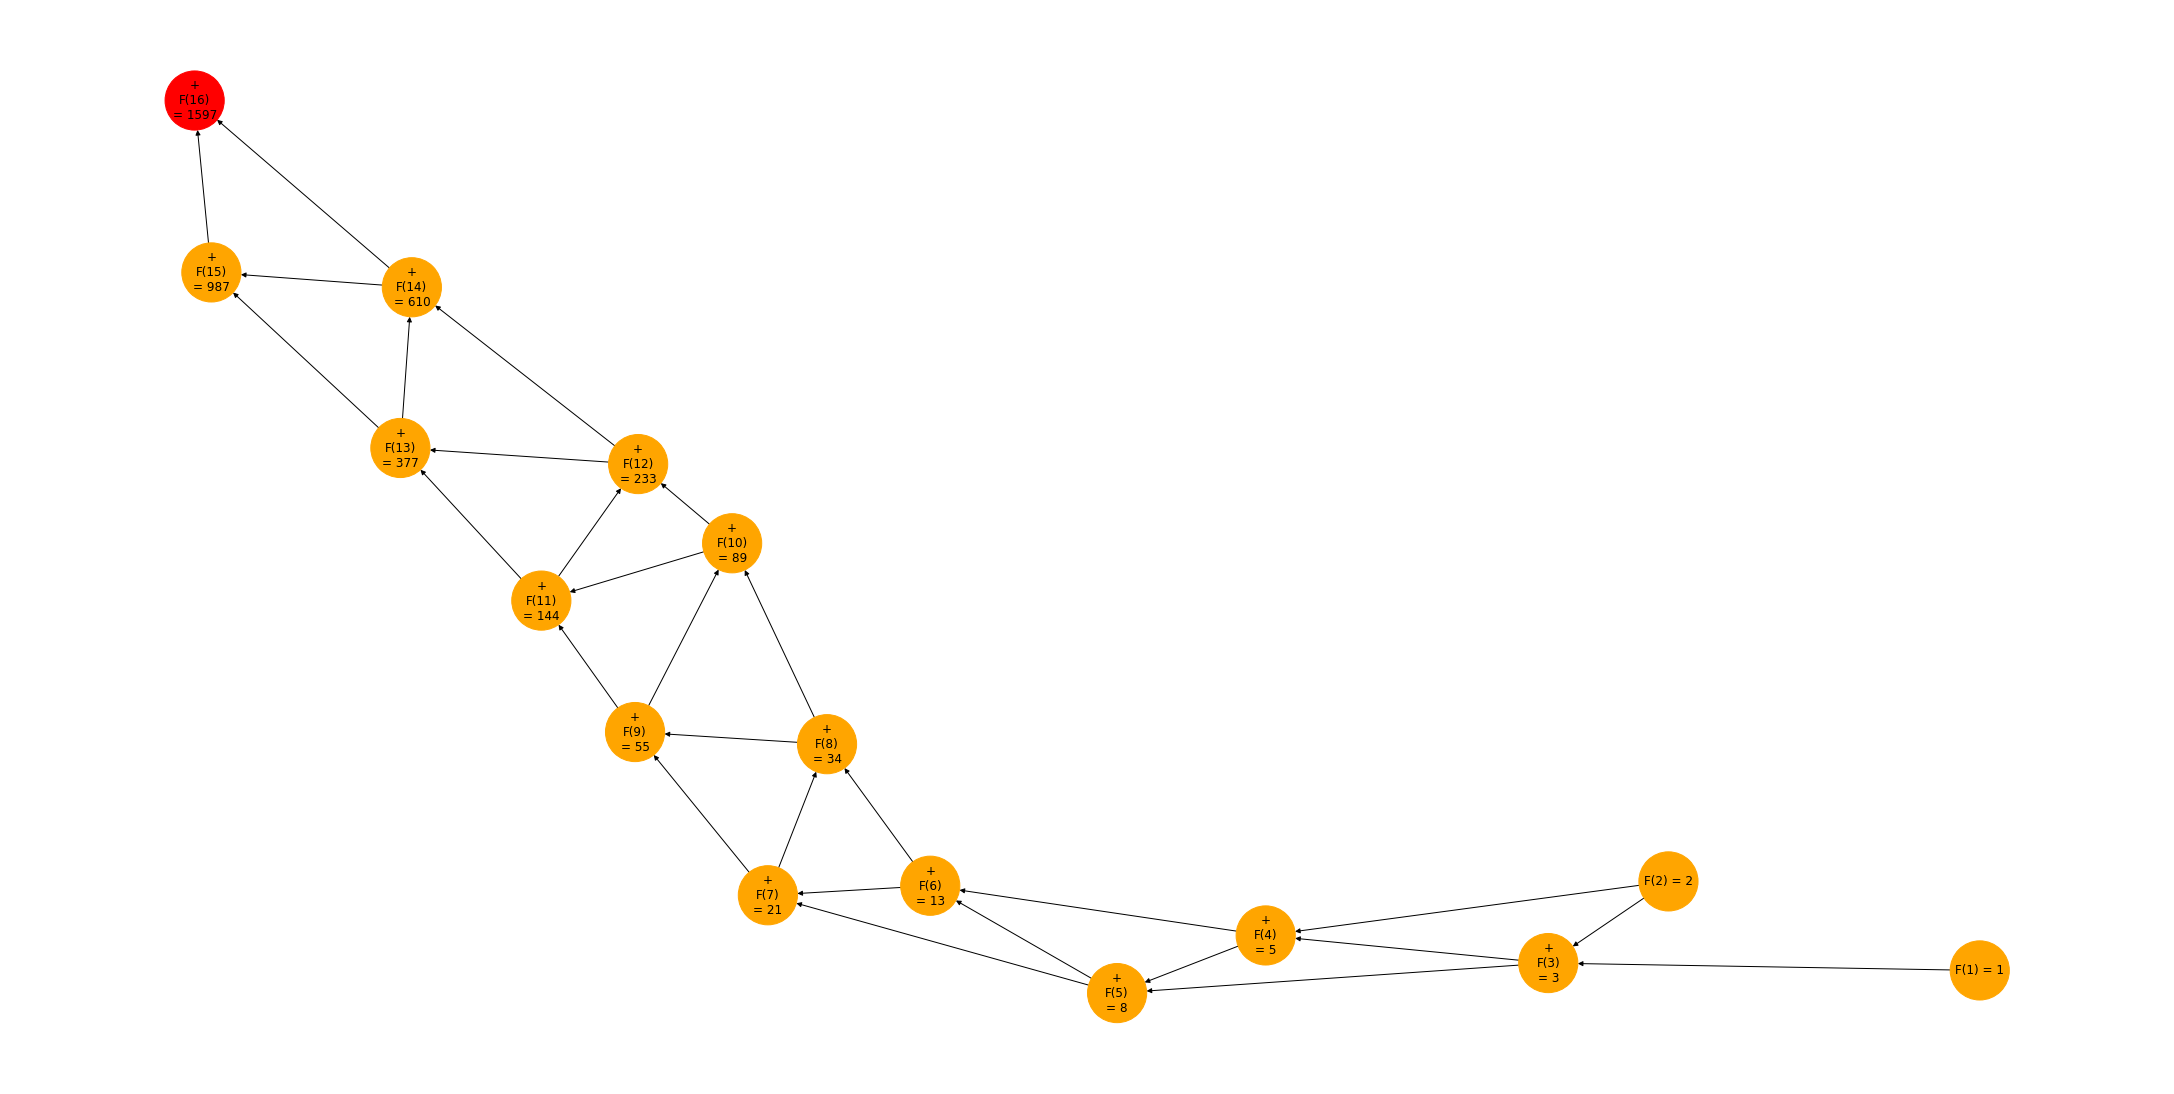

In [ ]:
draw_graph(16)

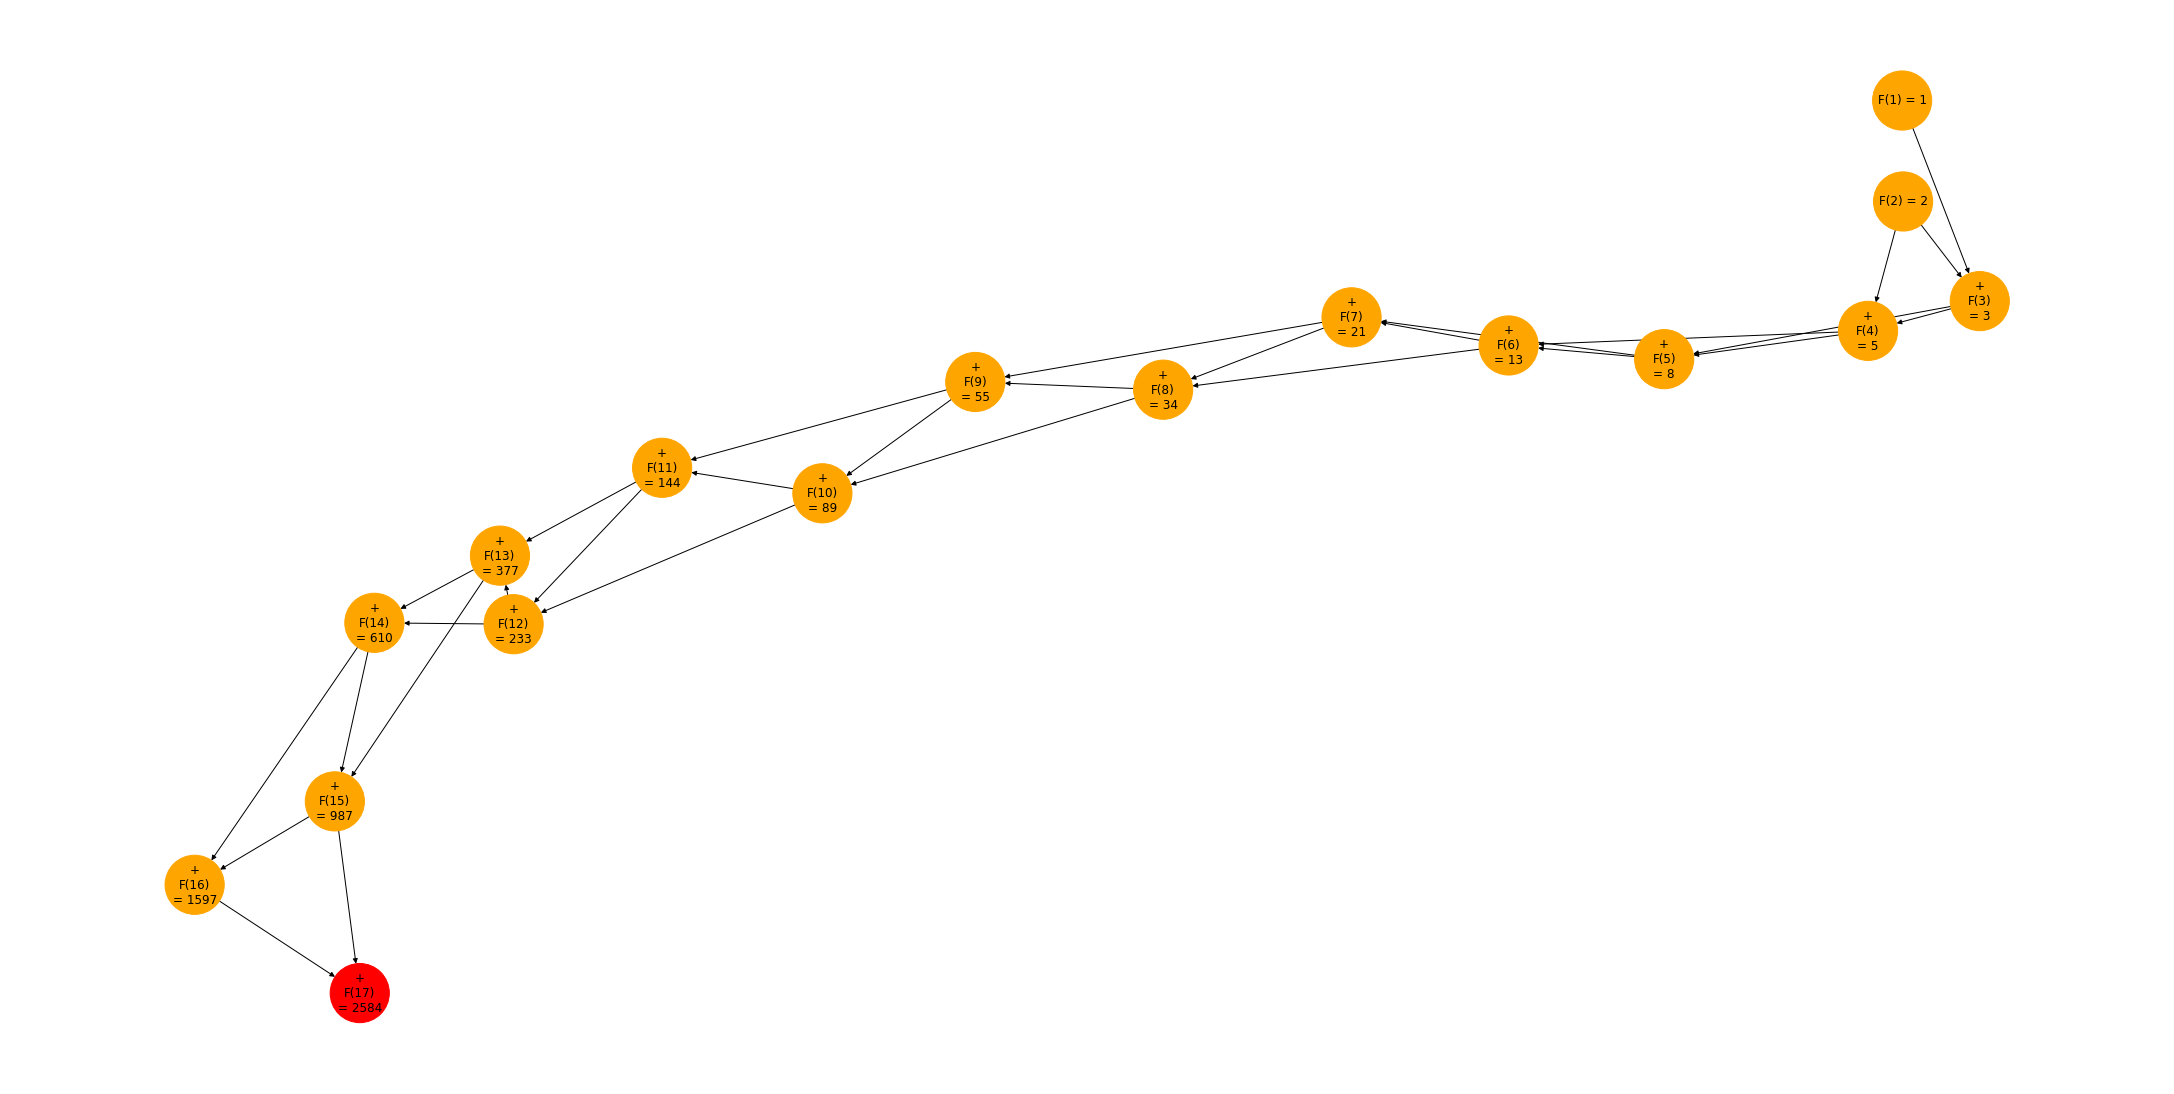

In [ ]:
draw_graph(17)

## Uwagi:

Czytelność grafu jest uzależniona od położenia jego węzłów. Chcąc zachować prostotę kodu nie modyfikowano domyślnego layoutu grafu. 